## Defining Noisy Environment ##

In [1]:
from tqdm import tqdm
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

In [2]:
from sklearn.model_selection import train_test_split
mndata = MNIST('data')
x_train_data, y_train_data = mndata.load_training()
x_test_data, y_test_data = mndata.load_testing()

training_steps=50000
checkpoint_loss=1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

class NoisyMnistEnv:
    def __init__(self, split, input_number_min, input_number_max, batch_size=32, seed=0):
        self.seed = seed
        self.split = split
        if self.split == "train":
            self.x, self.y = x_train_data, y_train_data
        elif self.split == "test":
            self.x, self.y = x_test_data, y_test_data
        self.batch_size = batch_size
        self.input_number_min = input_number_min
        self.input_number_max = input_number_max
        
    
    def step(self):
        x_arr = np.zeros((self.batch_size, 28 * 28))
        y_arr = np.zeros((self.batch_size, 28 * 28))

        for i in range(self.batch_size):
            input_number = np.random.randint(self.input_number_min, self.input_number_max)
            if input_number == 0:
                output_number = 0
            if input_number == 1:
                output_number = np.random.randint(2, 10)
            input_data = self.get_random_sample_of_number(input_number)
            if input_number == 1:
                output_data = self.get_random_sample_of_number(output_number)
            elif input_number == 0:
                output_data = input_data
            x_arr[i] = np.array(input_data)
            y_arr[i] = np.array(output_data)
        return x_arr, y_arr
    
    def get_random_sample_of_number(self, number):
        random_num = np.random.randint(0, len(self.y) - 1)
        if self.y[random_num] == number:
            return self.x[random_num]
        else:
            return self.get_random_sample_of_number(number)

device: cuda


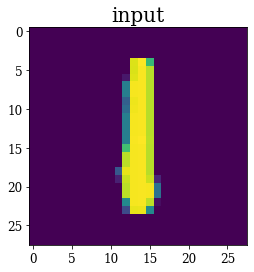

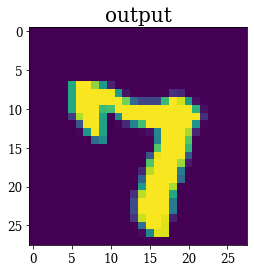

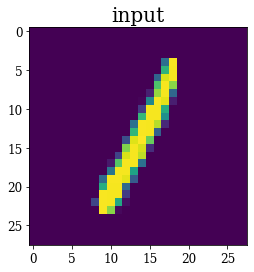

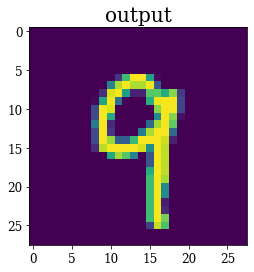

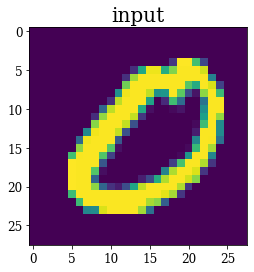

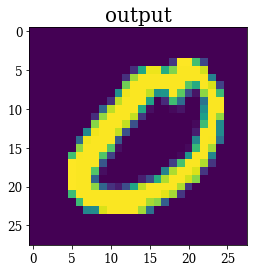

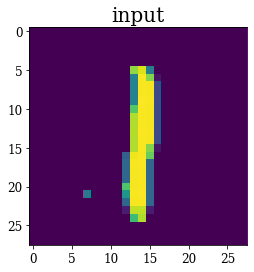

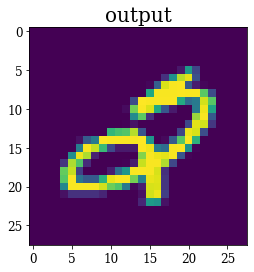

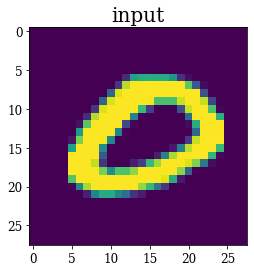

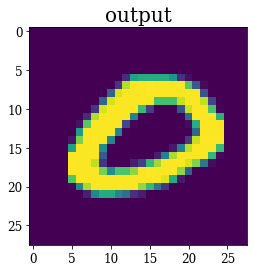

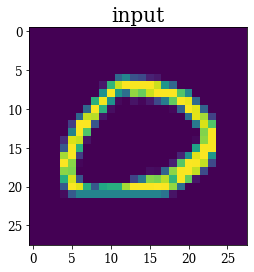

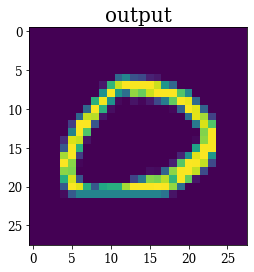

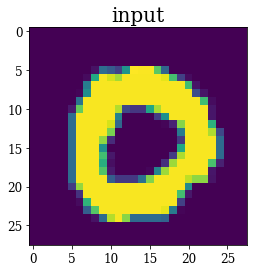

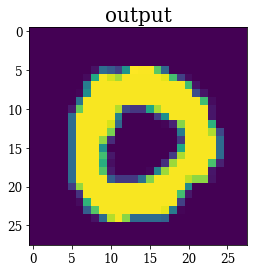

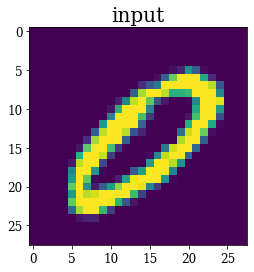

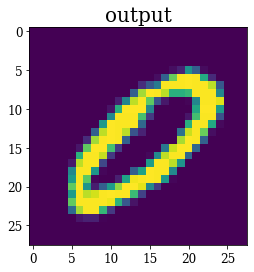

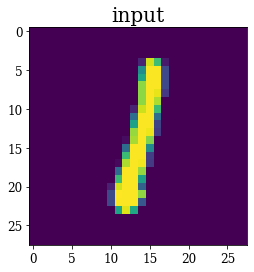

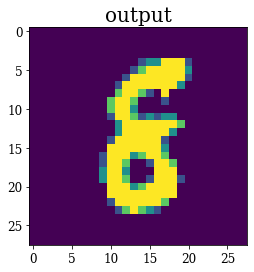

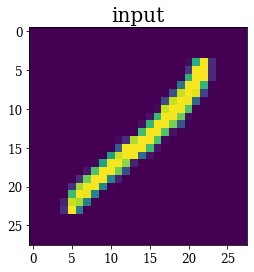

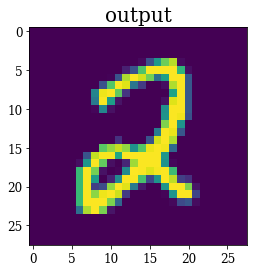

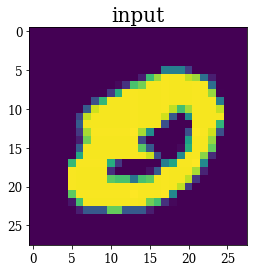

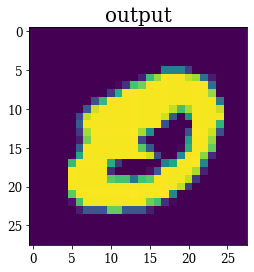

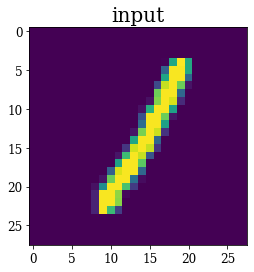

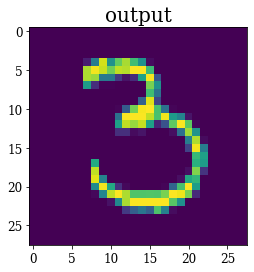

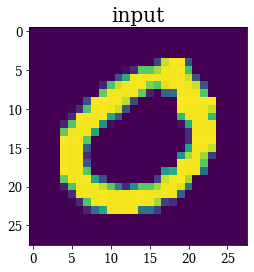

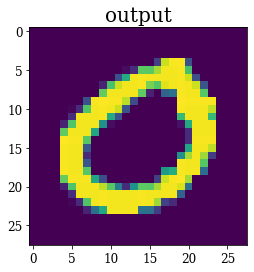

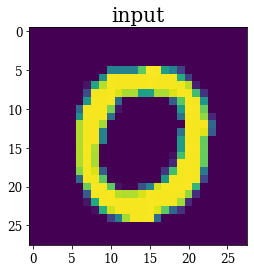

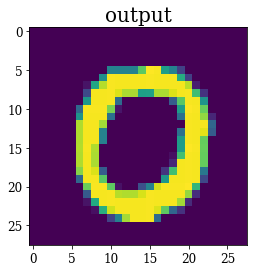

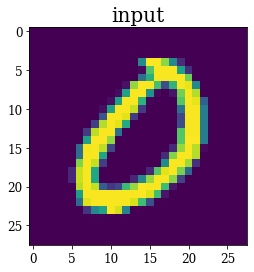

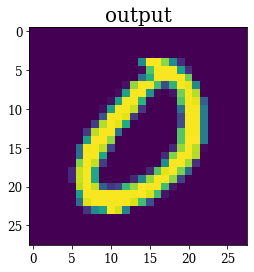

In [3]:
mnist_env = NoisyMnistEnv("test", 0, 2)
x, y  = mnist_env.step()
count = 0
for i in zip(x,y):
    count += 1
    if count == 16:
        break
    plt.title("input", fontsize=20)
    plt.imshow(np.squeeze(i[0]).reshape(28, 28))
    plt.show()
    plt.title("output", fontsize=20)
    plt.imshow(np.squeeze(i[1]).reshape(28, 28))
    plt.show()

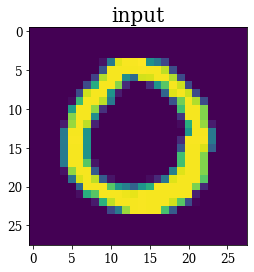

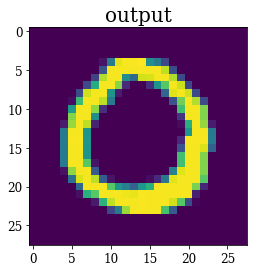

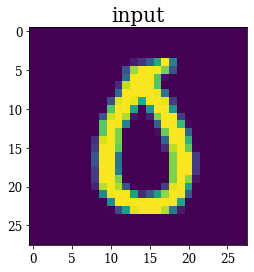

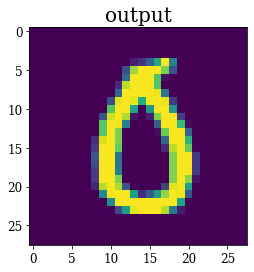

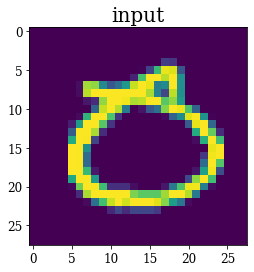

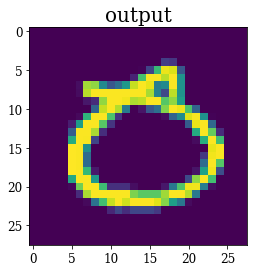

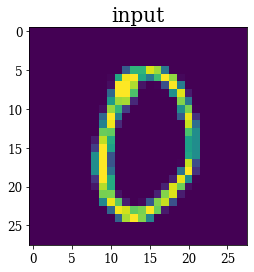

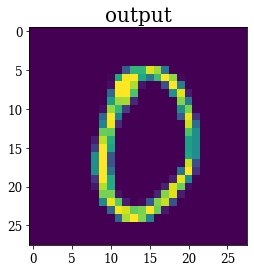

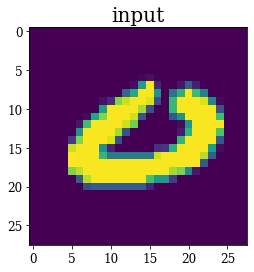

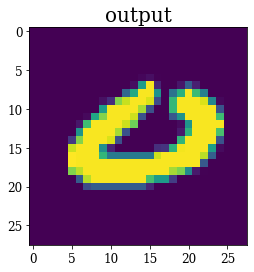

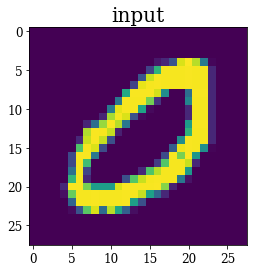

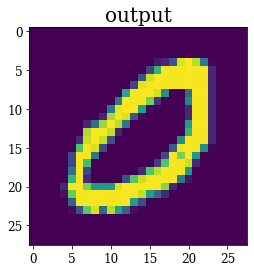

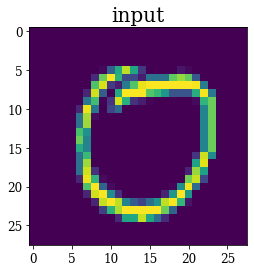

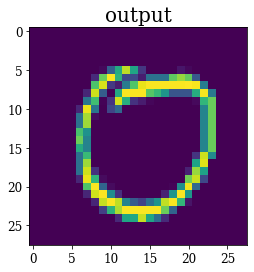

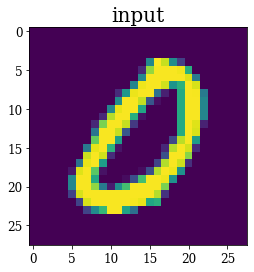

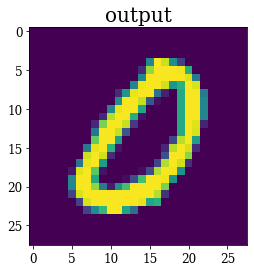

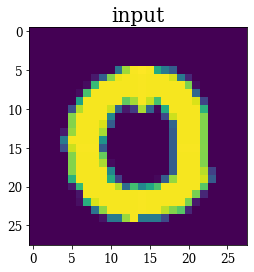

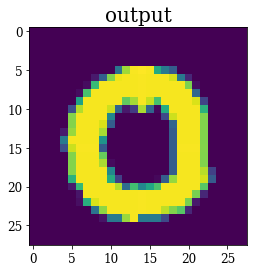

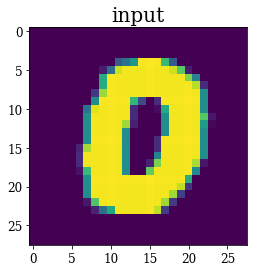

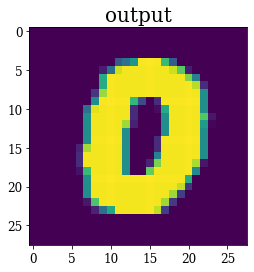

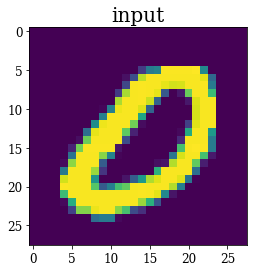

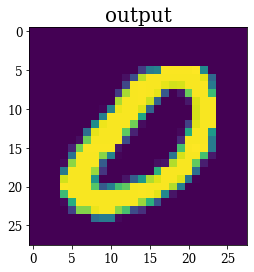

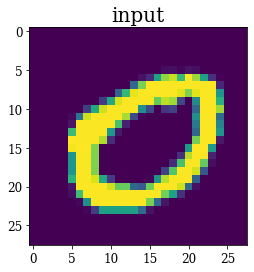

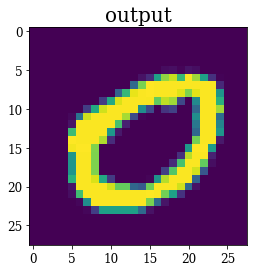

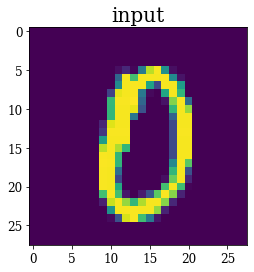

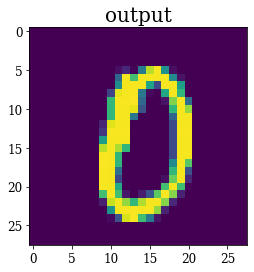

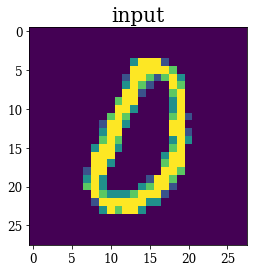

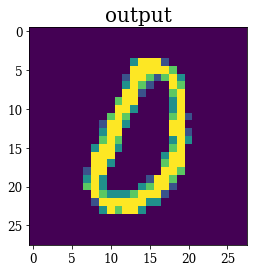

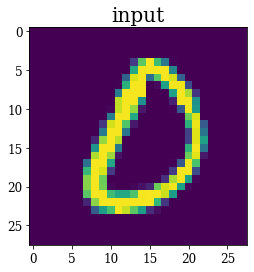

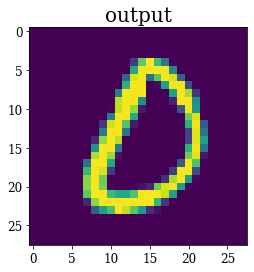

In [4]:
mnist_env_zeros = NoisyMnistEnv("test", 0, 1)
x, y  = mnist_env_zeros.step()
count = 0
for i in zip(x,y):
    count += 1
    if count == 16:
        break
    plt.title("input", fontsize=20)
    plt.imshow(np.squeeze(i[0]).reshape(28, 28))
    plt.show()
    plt.title("output", fontsize=20)
    plt.imshow(np.squeeze(i[1]).reshape(28, 28))
    plt.show()

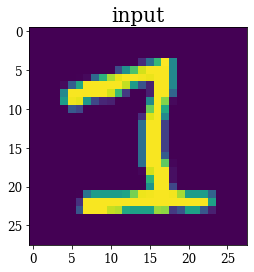

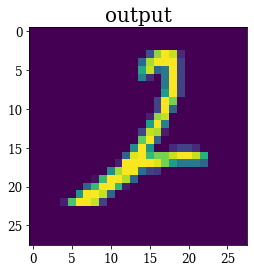

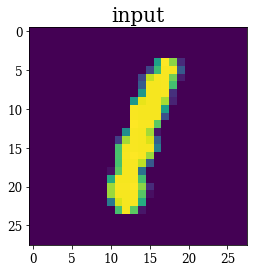

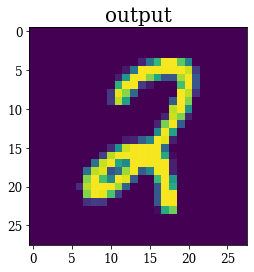

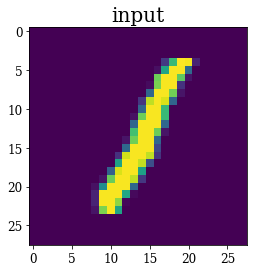

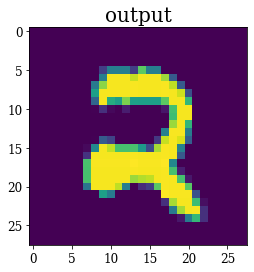

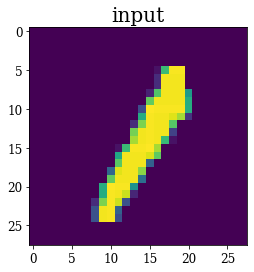

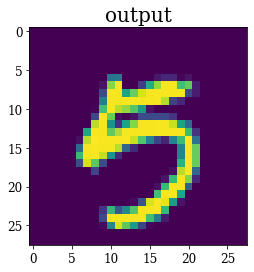

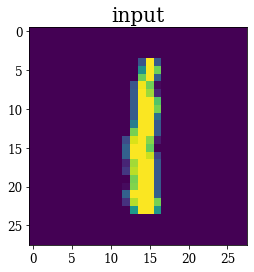

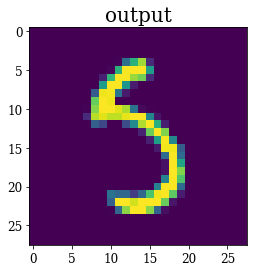

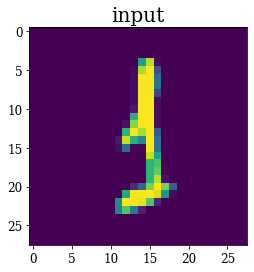

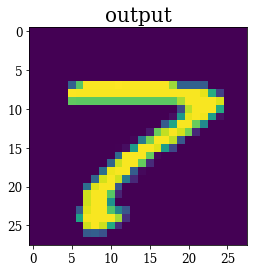

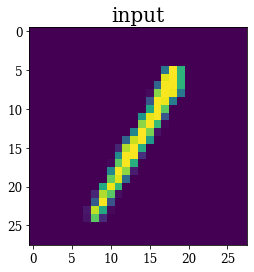

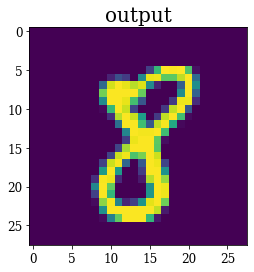

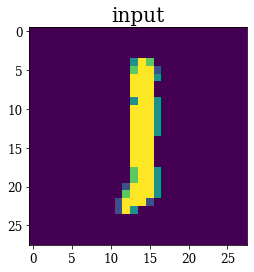

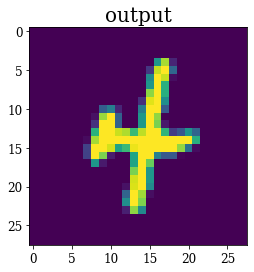

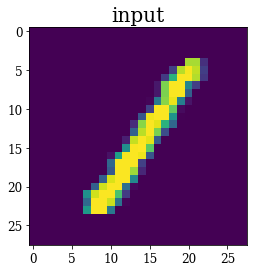

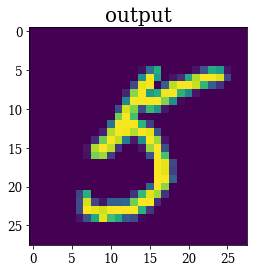

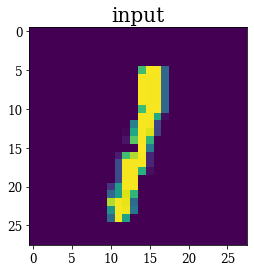

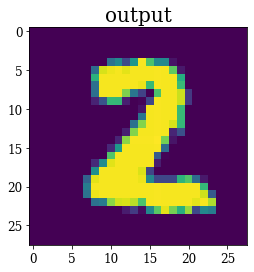

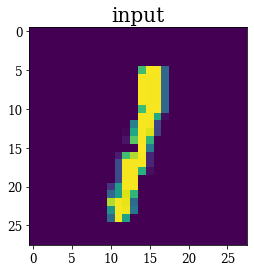

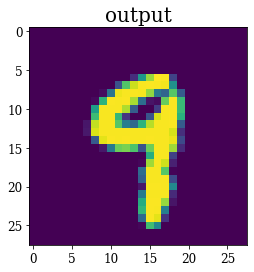

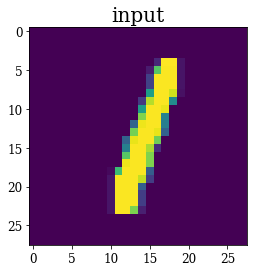

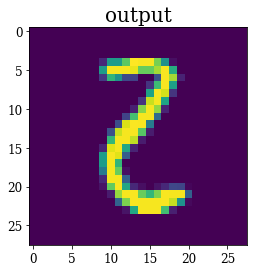

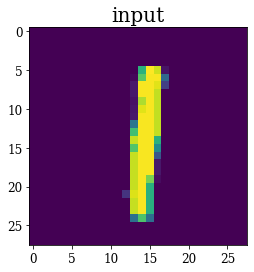

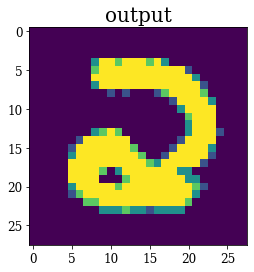

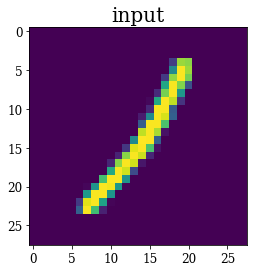

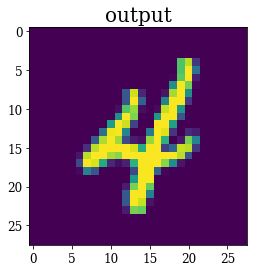

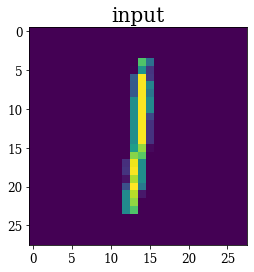

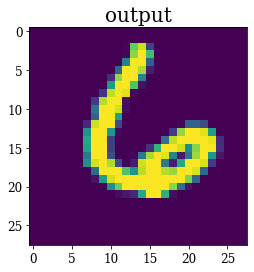

In [5]:
mnist_env_ones = NoisyMnistEnv("test", 1, 2)
x, y  = mnist_env_ones.step()
count = 0
for i in zip(x,y):
    count += 1
    if count == 16:
        break
    plt.title("input", fontsize=20)
    plt.imshow(np.squeeze(i[0]).reshape(28, 28))
    plt.show()
    plt.title("output", fontsize=20)
    plt.imshow(np.squeeze(i[1]).reshape(28, 28))
    plt.show()

## Defining Models ##

In [6]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# from here https://github.com/L1aoXingyu/pytorch-beginner/tree/master/08-AutoEncoder
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_1 = nn.Linear(28 * 28, 128)
        self.linear_2 = nn.Linear(128, 128)
        self.linear_3 = nn.Linear(128, 128)
        self.linear_4 = nn.Linear(128, 28 * 28)
        
    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = F.relu(self.linear_3(x))
        x = (self.linear_4(x))
        return x
    
# from here https://github.com/L1aoXingyu/pytorch-beginner/tree/master/08-AutoEncoder
class AleatoricNet(nn.Module):
    def __init__(self):
        super(AleatoricNet, self).__init__()
        self.linear_1 = nn.Linear(28 * 28, 128)
        self.linear_2 = nn.Linear(128, 128)
        self.linear_3_mu = nn.Linear(128, 128)
        self.linear_4_mu = nn.Linear(128, 28 * 28)
        self.linear_3_sigma = nn.Linear(128, 128)
        self.linear_4_sigma = nn.Linear(128, 28 * 28)
        
    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        mu = F.relu(self.linear_3_mu(x))
        mu = (self.linear_4_mu(mu))
        log_sigma = F.relu(self.linear_3_sigma(x))
        log_sigma = (self.linear_4_sigma(log_sigma))
        return mu, log_sigma

### Vanilla ###

  0%|          | 11/50000 [00:00<18:02, 46.19it/s]

loss 0 0.14528003
loss 1 0.120912045


  2%|▏         | 1007/50000 [00:18<15:25, 52.94it/s]

loss 0 0.024533026
loss 1 0.067665026


  4%|▍         | 2005/50000 [00:35<16:21, 48.90it/s]

loss 0 0.012602814
loss 1 0.066803224


  6%|▌         | 3009/50000 [00:53<14:57, 52.38it/s]

loss 0 0.0102068605
loss 1 0.06682848


  8%|▊         | 4005/50000 [01:10<14:58, 51.21it/s]

loss 0 0.008960898
loss 1 0.06664647


 10%|█         | 5009/50000 [01:28<14:00, 53.55it/s]

loss 0 0.008062216
loss 1 0.066746905


 12%|█▏        | 6007/50000 [01:46<13:56, 52.58it/s]

loss 0 0.007413408
loss 1 0.06671523


 14%|█▍        | 7006/50000 [02:03<14:08, 50.68it/s]

loss 0 0.0070849545
loss 1 0.06678471


 16%|█▌        | 8010/50000 [02:21<13:17, 52.62it/s]

loss 0 0.006736785
loss 1 0.06683256


 18%|█▊        | 9007/50000 [02:38<13:13, 51.66it/s]

loss 0 0.006599669
loss 1 0.066657275


 20%|██        | 10011/50000 [02:56<12:27, 53.49it/s]

loss 0 0.006370887
loss 1 0.06667453


 22%|██▏       | 11007/50000 [03:14<12:16, 52.94it/s]

loss 0 0.0061733993
loss 1 0.066692084


 24%|██▍       | 12005/50000 [03:31<12:52, 49.17it/s]

loss 0 0.0061460487
loss 1 0.0667136


 26%|██▌       | 13007/50000 [03:49<11:40, 52.83it/s]

loss 0 0.0060397303
loss 1 0.06666703


 28%|██▊       | 14009/50000 [04:07<11:30, 52.14it/s]

loss 0 0.005819546
loss 1 0.06669516


 30%|███       | 15005/50000 [04:24<11:36, 50.26it/s]

loss 0 0.005767923
loss 1 0.06671039


 32%|███▏      | 16007/50000 [04:42<10:42, 52.90it/s]

loss 0 0.0056995163
loss 1 0.066421546


 34%|███▍      | 17009/50000 [05:00<10:20, 53.14it/s]

loss 0 0.005536206
loss 1 0.06655257


 36%|███▌      | 18011/50000 [05:17<10:05, 52.87it/s]

loss 0 0.0055734725
loss 1 0.06660356


 38%|███▊      | 19007/50000 [05:35<09:49, 52.55it/s]

loss 0 0.005456223
loss 1 0.06654132


 40%|████      | 20009/50000 [05:53<09:35, 52.12it/s]

loss 0 0.005326337
loss 1 0.066678025


 42%|████▏     | 21006/50000 [06:10<09:36, 50.27it/s]

loss 0 0.0053512673
loss 1 0.06673916


 44%|████▍     | 22008/50000 [06:28<08:49, 52.91it/s]

loss 0 0.005160277
loss 1 0.066572234


 46%|████▌     | 23011/50000 [06:46<08:30, 52.89it/s]

loss 0 0.0051750857
loss 1 0.066494465


 48%|████▊     | 24007/50000 [07:03<08:15, 52.49it/s]

loss 0 0.0051737814
loss 1 0.06643994


 50%|█████     | 25009/50000 [07:21<07:56, 52.45it/s]

loss 0 0.005106067
loss 1 0.066594884


 52%|█████▏    | 26005/50000 [07:39<07:56, 50.40it/s]

loss 0 0.005013405
loss 1 0.06644809


 54%|█████▍    | 27007/50000 [07:56<07:20, 52.26it/s]

loss 0 0.0049577923
loss 1 0.066609256


 56%|█████▌    | 28009/50000 [08:14<06:51, 53.48it/s]

loss 0 0.004921288
loss 1 0.0665696


 58%|█████▊    | 29005/50000 [08:32<06:46, 51.65it/s]

loss 0 0.004891681
loss 1 0.066458404


 60%|██████    | 30007/50000 [08:49<06:17, 52.97it/s]

loss 0 0.004925696
loss 1 0.066777855


 62%|██████▏   | 31005/50000 [09:07<06:11, 51.14it/s]

loss 0 0.004815207
loss 1 0.066553466


 64%|██████▍   | 32007/50000 [09:25<05:35, 53.70it/s]

loss 0 0.004811336
loss 1 0.066704184


 66%|██████▌   | 33009/50000 [09:42<05:23, 52.54it/s]

loss 0 0.0047945464
loss 1 0.0665091


 68%|██████▊   | 34011/50000 [10:00<05:02, 52.81it/s]

loss 0 0.0047791353
loss 1 0.06653755


 70%|███████   | 35007/50000 [10:18<04:44, 52.74it/s]

loss 0 0.0047554104
loss 1 0.06659342


 72%|███████▏  | 36010/50000 [10:35<04:23, 53.04it/s]

loss 0 0.0047723306
loss 1 0.06653095


 74%|███████▍  | 37006/50000 [10:53<04:11, 51.67it/s]

loss 0 0.004721491
loss 1 0.06655728


 76%|███████▌  | 38008/50000 [11:11<03:46, 52.85it/s]

loss 0 0.00469556
loss 1 0.066486426


 78%|███████▊  | 39011/50000 [11:28<03:25, 53.40it/s]

loss 0 0.004719781
loss 1 0.066511944


 80%|████████  | 40007/50000 [11:46<03:10, 52.53it/s]

loss 0 0.0046831053
loss 1 0.06657113


 82%|████████▏ | 41010/50000 [12:04<02:50, 52.82it/s]

loss 0 0.0047170455
loss 1 0.066740006


 84%|████████▍ | 42006/50000 [12:21<02:36, 51.05it/s]

loss 0 0.0046730274
loss 1 0.06659622


 86%|████████▌ | 43008/50000 [12:39<02:10, 53.49it/s]

loss 0 0.004642237
loss 1 0.0665494


 88%|████████▊ | 44010/50000 [12:57<01:53, 52.70it/s]

loss 0 0.0046627955
loss 1 0.06652484


 90%|█████████ | 45008/50000 [13:14<01:33, 53.24it/s]

loss 0 0.004635384
loss 1 0.06653023


 92%|█████████▏| 46010/50000 [13:32<01:15, 53.05it/s]

loss 0 0.004618377
loss 1 0.06643538


 94%|█████████▍| 47006/50000 [13:50<00:58, 51.30it/s]

loss 0 0.0046188585
loss 1 0.06639714


 96%|█████████▌| 48008/50000 [14:07<00:36, 54.12it/s]

loss 0 0.004644909
loss 1 0.06649559


 98%|█████████▊| 49010/50000 [14:25<00:18, 52.22it/s]

loss 0 0.004622144
loss 1 0.06663552


100%|██████████| 50000/50000 [14:42<00:00, 56.63it/s]


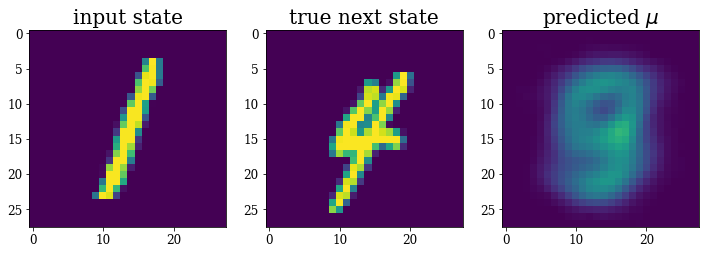

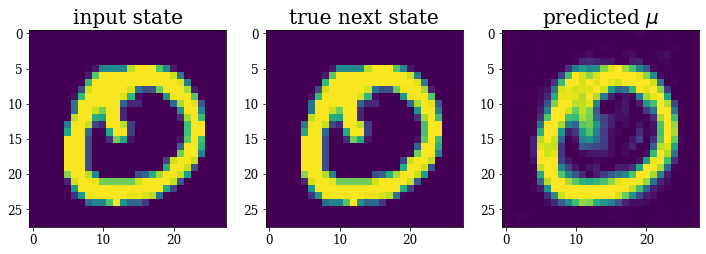

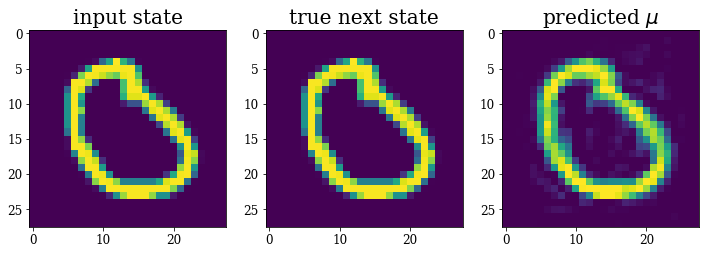

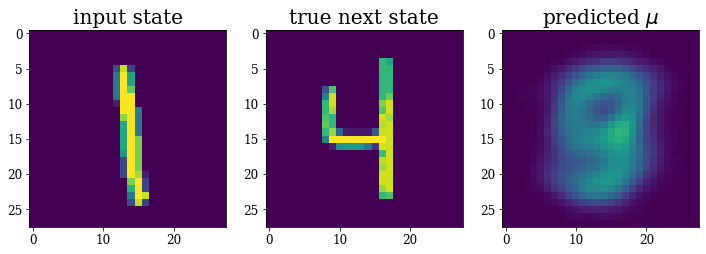

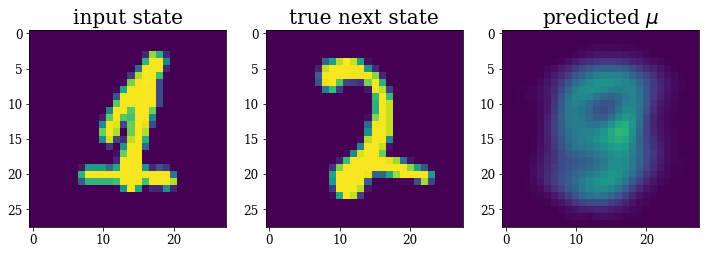

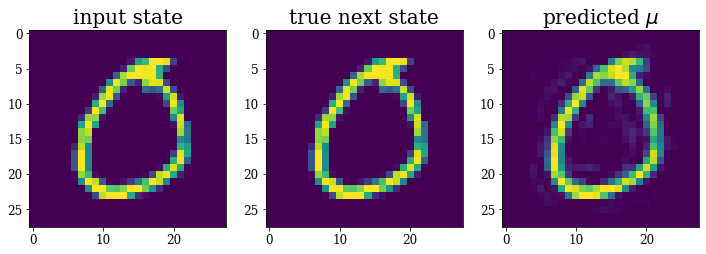

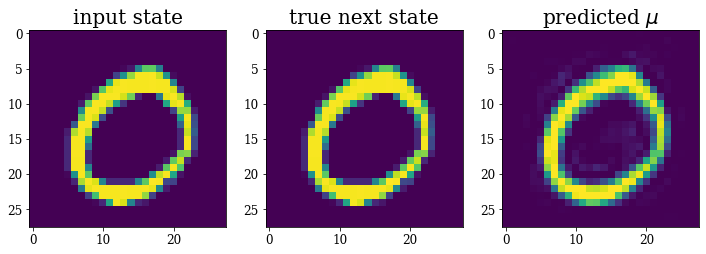

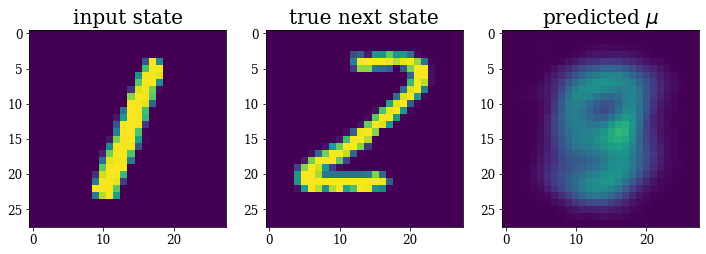

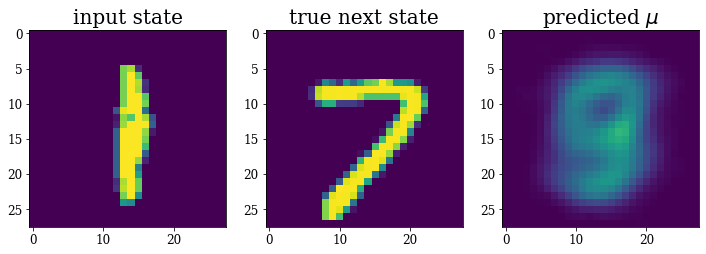

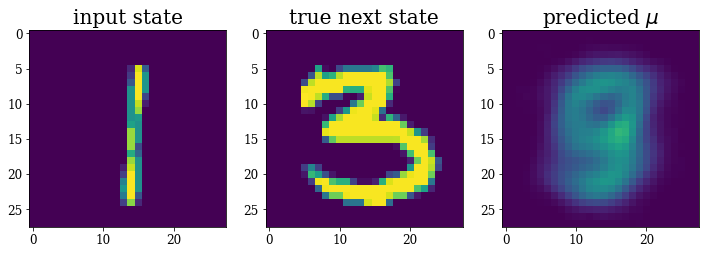

  0%|          | 6/50000 [00:00<15:16, 54.54it/s]

loss 0 0.15051228
loss 1 0.11519163


  2%|▏         | 1008/50000 [00:17<15:23, 53.04it/s]

loss 0 0.02470582
loss 1 0.06787537


  4%|▍         | 2005/50000 [00:35<15:55, 50.21it/s]

loss 0 0.012833182
loss 1 0.0668767


  6%|▌         | 3007/50000 [00:53<14:56, 52.40it/s]

loss 0 0.010350061
loss 1 0.06682605


  8%|▊         | 4009/50000 [01:11<14:28, 52.98it/s]

loss 0 0.009226716
loss 1 0.066775344


 10%|█         | 5011/50000 [01:29<14:23, 52.07it/s]

loss 0 0.008300465
loss 1 0.06669072


 12%|█▏        | 6007/50000 [01:46<14:01, 52.30it/s]

loss 0 0.007719171
loss 1 0.0667108


 14%|█▍        | 7009/50000 [02:04<13:39, 52.43it/s]

loss 0 0.007327695
loss 1 0.06650292


 16%|█▌        | 8005/50000 [02:22<13:35, 51.48it/s]

loss 0 0.0070426874
loss 1 0.06652184


 18%|█▊        | 9007/50000 [02:40<13:07, 52.08it/s]

loss 0 0.0067741186
loss 1 0.06671835


 20%|██        | 10009/50000 [02:57<12:39, 52.64it/s]

loss 0 0.0066287294
loss 1 0.066652976


 22%|██▏       | 11005/50000 [03:15<12:48, 50.73it/s]

loss 0 0.0063604503
loss 1 0.06646782


 24%|██▍       | 12007/50000 [03:33<11:57, 52.97it/s]

loss 0 0.006269936
loss 1 0.06674648


 26%|██▌       | 13009/50000 [03:51<11:51, 51.98it/s]

loss 0 0.006190405
loss 1 0.06661623


 28%|██▊       | 14011/50000 [04:09<11:24, 52.60it/s]

loss 0 0.0059733302
loss 1 0.066579826


 30%|███       | 15007/50000 [04:26<11:15, 51.83it/s]

loss 0 0.005880976
loss 1 0.06669261


 32%|███▏      | 16009/50000 [04:44<10:45, 52.65it/s]

loss 0 0.00582106
loss 1 0.06665508


 34%|███▍      | 17005/50000 [05:02<10:52, 50.58it/s]

loss 0 0.005678282
loss 1 0.06660202


 36%|███▌      | 18007/50000 [05:19<10:13, 52.11it/s]

loss 0 0.005616894
loss 1 0.06671103


 38%|███▊      | 19009/50000 [05:37<09:47, 52.71it/s]

loss 0 0.005603293
loss 1 0.06688929


 40%|████      | 20010/50000 [05:55<09:24, 53.15it/s]

loss 0 0.0055884467
loss 1 0.066566885


 42%|████▏     | 21006/50000 [06:13<09:29, 50.87it/s]

loss 0 0.0054137902
loss 1 0.06663701


 44%|████▍     | 22008/50000 [06:31<08:48, 52.92it/s]

loss 0 0.005435279
loss 1 0.066453986


 46%|████▌     | 23010/50000 [06:49<08:29, 52.98it/s]

loss 0 0.0053734053
loss 1 0.06672724


 48%|████▊     | 24007/50000 [07:06<08:16, 52.36it/s]

loss 0 0.0053826976
loss 1 0.066415206


 50%|█████     | 25009/50000 [07:24<07:55, 52.51it/s]

loss 0 0.0053312443
loss 1 0.06647529


 52%|█████▏    | 26005/50000 [07:41<08:28, 47.21it/s]

loss 0 0.00533348
loss 1 0.06673522


 54%|█████▍    | 27009/50000 [07:59<07:27, 51.37it/s]

loss 0 0.0053220885
loss 1 0.06651793


 56%|█████▌    | 28011/50000 [08:17<06:50, 53.58it/s]

loss 0 0.005249764
loss 1 0.0666943


 58%|█████▊    | 29007/50000 [08:34<06:36, 53.01it/s]

loss 0 0.0052888757
loss 1 0.06659395


 60%|██████    | 30009/50000 [08:52<06:23, 52.12it/s]

loss 0 0.005215569
loss 1 0.06651964


 62%|██████▏   | 31005/50000 [09:10<06:11, 51.11it/s]

loss 0 0.0052124998
loss 1 0.06665514


 64%|██████▍   | 32007/50000 [09:27<05:44, 52.17it/s]

loss 0 0.0052300175
loss 1 0.06669471


 66%|██████▌   | 33009/50000 [09:45<05:28, 51.77it/s]

loss 0 0.00518374
loss 1 0.06656334


 68%|██████▊   | 34011/50000 [10:03<05:02, 52.90it/s]

loss 0 0.005146595
loss 1 0.06661373


 70%|███████   | 35009/50000 [10:20<04:47, 52.16it/s]

loss 0 0.005167638
loss 1 0.0665089


 72%|███████▏  | 36006/50000 [10:38<04:36, 50.68it/s]

loss 0 0.0051421104
loss 1 0.06667888


 74%|███████▍  | 37008/50000 [10:56<04:12, 51.54it/s]

loss 0 0.0051125237
loss 1 0.06667847


 76%|███████▌  | 38010/50000 [11:13<03:47, 52.80it/s]

loss 0 0.0050810827
loss 1 0.066473655


 78%|███████▊  | 39006/50000 [11:31<03:35, 51.02it/s]

loss 0 0.0051345904
loss 1 0.06662496


 80%|████████  | 40008/50000 [11:49<03:07, 53.26it/s]

loss 0 0.0050928276
loss 1 0.066461995


 82%|████████▏ | 41006/50000 [12:06<02:53, 51.75it/s]

loss 0 0.0050754827
loss 1 0.066645354


 84%|████████▍ | 42011/50000 [12:24<02:28, 53.76it/s]

loss 0 0.0051003676
loss 1 0.066596806


 86%|████████▌ | 43009/50000 [12:41<02:12, 52.67it/s]

loss 0 0.0050495216
loss 1 0.066739365


 88%|████████▊ | 44011/50000 [12:59<01:52, 53.11it/s]

loss 0 0.0050661475
loss 1 0.06662488


 90%|█████████ | 45009/50000 [13:16<01:33, 53.20it/s]

loss 0 0.005024099
loss 1 0.06649857


 92%|█████████▏| 46011/50000 [13:34<01:15, 53.01it/s]

loss 0 0.0050491584
loss 1 0.06658336


 94%|█████████▍| 47007/50000 [13:52<00:56, 52.68it/s]

loss 0 0.005001344
loss 1 0.06653174


 96%|█████████▌| 48008/50000 [14:09<00:37, 52.48it/s]

loss 0 0.005027767
loss 1 0.06653242


 98%|█████████▊| 49005/50000 [14:27<00:19, 50.79it/s]

loss 0 0.0050047496
loss 1 0.06661959


100%|██████████| 50000/50000 [14:44<00:00, 56.50it/s]


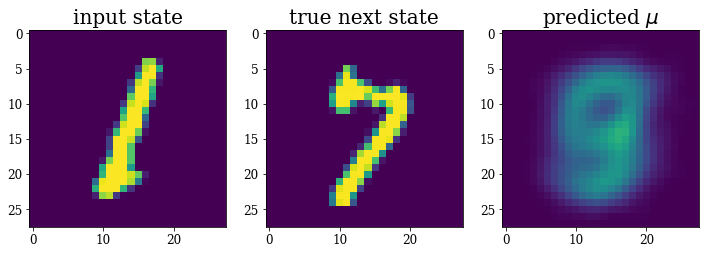

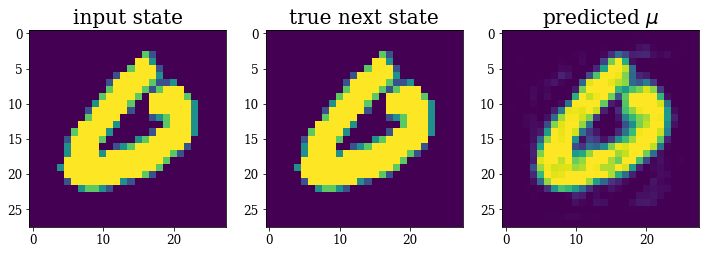

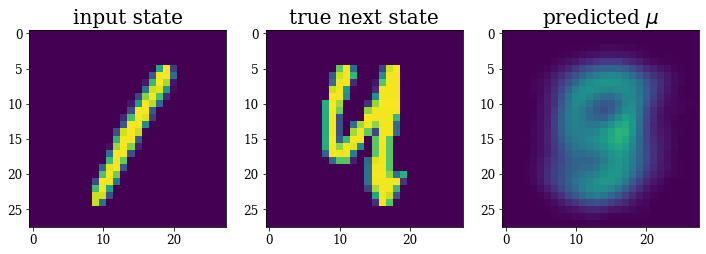

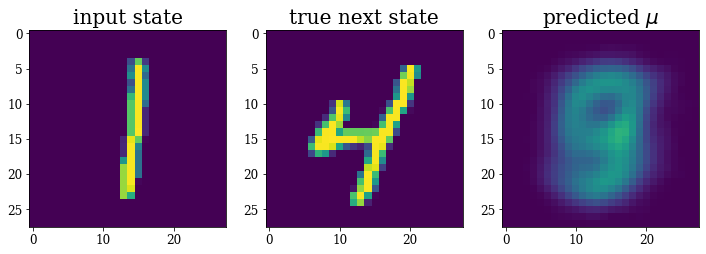

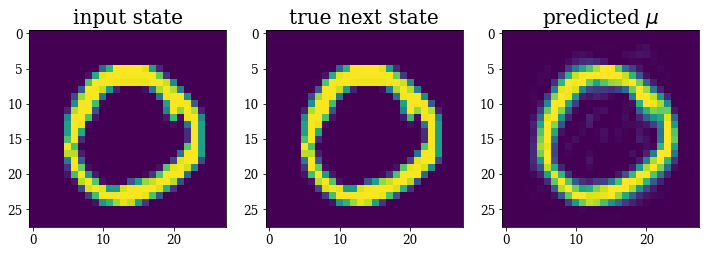

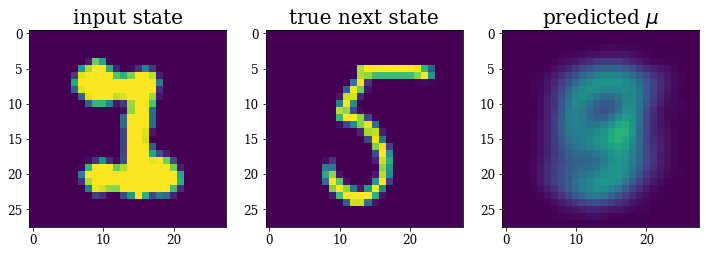

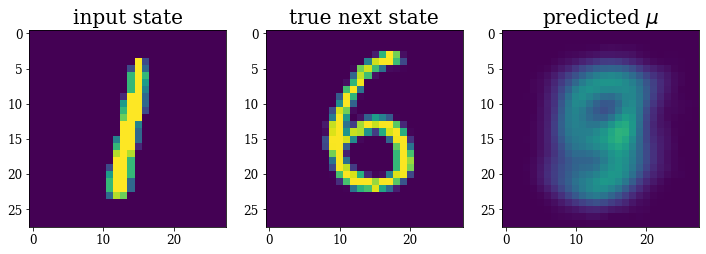

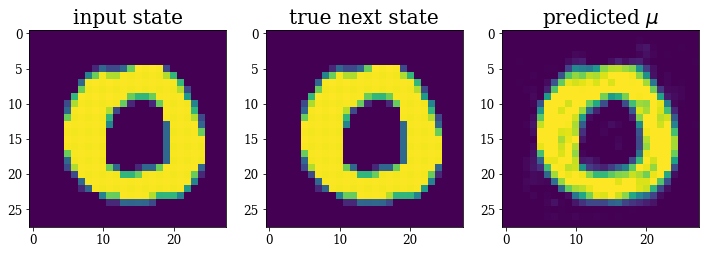

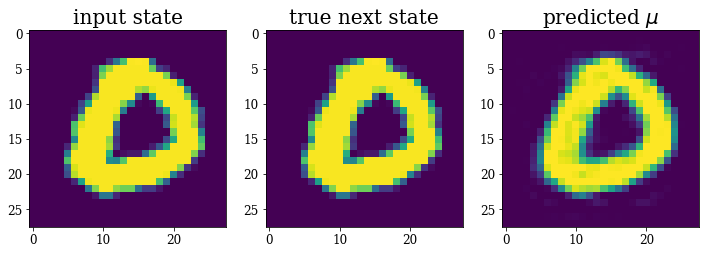

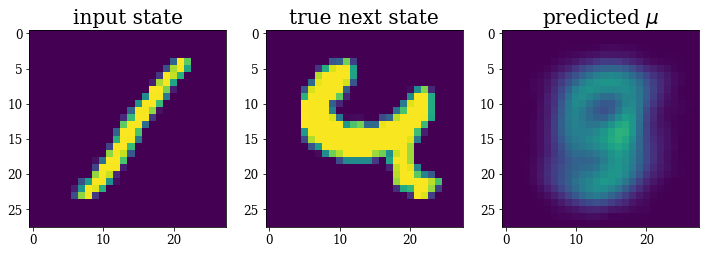

  0%|          | 6/50000 [00:00<14:57, 55.69it/s]

loss 0 0.16062799
loss 1 0.1238533


  2%|▏         | 1008/50000 [00:17<15:28, 52.74it/s]

loss 0 0.024270842
loss 1 0.067873254


  4%|▍         | 2010/50000 [00:35<15:04, 53.05it/s]

loss 0 0.012479709
loss 1 0.06693215


  6%|▌         | 3006/50000 [00:53<15:22, 50.95it/s]

loss 0 0.010035327
loss 1 0.06692329


  8%|▊         | 4008/50000 [01:10<14:28, 52.97it/s]

loss 0 0.008738853
loss 1 0.06665564


 10%|█         | 5010/50000 [01:28<14:35, 51.37it/s]

loss 0 0.007989263
loss 1 0.066832684


 12%|█▏        | 6006/50000 [01:46<14:15, 51.41it/s]

loss 0 0.007390392
loss 1 0.066714175


 14%|█▍        | 7008/50000 [02:04<13:37, 52.58it/s]

loss 0 0.0069922814
loss 1 0.06659174


 16%|█▌        | 8010/50000 [02:21<13:18, 52.59it/s]

loss 0 0.0067101954
loss 1 0.066584006


 18%|█▊        | 9006/50000 [02:39<13:23, 51.03it/s]

loss 0 0.0064394376
loss 1 0.06661547


 20%|██        | 10009/50000 [02:57<12:32, 53.11it/s]

loss 0 0.00624003
loss 1 0.06668283


 22%|██▏       | 11006/50000 [03:14<12:40, 51.28it/s]

loss 0 0.0060804184
loss 1 0.06669439


 24%|██▍       | 12008/50000 [03:32<11:59, 52.79it/s]

loss 0 0.0059394543
loss 1 0.06676128


 26%|██▌       | 13011/50000 [03:50<11:41, 52.72it/s]

loss 0 0.0058747875
loss 1 0.06674018


 28%|██▊       | 14008/50000 [04:07<11:23, 52.66it/s]

loss 0 0.0056907455
loss 1 0.06670793


 30%|███       | 15011/50000 [04:25<11:01, 52.92it/s]

loss 0 0.0055710627
loss 1 0.066765346


 32%|███▏      | 16007/50000 [04:43<10:46, 52.60it/s]

loss 0 0.0055059
loss 1 0.06666213


 34%|███▍      | 17009/50000 [05:00<10:18, 53.31it/s]

loss 0 0.0054138605
loss 1 0.06675154


 36%|███▌      | 18011/50000 [05:18<10:06, 52.73it/s]

loss 0 0.0053286343
loss 1 0.066657


 38%|███▊      | 19009/50000 [05:35<09:37, 53.70it/s]

loss 0 0.005252716
loss 1 0.066821605


 40%|████      | 20006/50000 [05:53<09:49, 50.92it/s]

loss 0 0.005167264
loss 1 0.0666874


 42%|████▏     | 21008/50000 [06:11<09:09, 52.79it/s]

loss 0 0.0051502315
loss 1 0.06667293


 44%|████▍     | 22010/50000 [06:28<08:56, 52.17it/s]

loss 0 0.0051191556
loss 1 0.06654239


 46%|████▌     | 23007/50000 [06:46<08:30, 52.87it/s]

loss 0 0.0051264595
loss 1 0.0665799


 48%|████▊     | 24010/50000 [07:04<08:21, 51.83it/s]

loss 0 0.0050289067
loss 1 0.06664847


 50%|█████     | 25006/50000 [07:21<08:06, 51.36it/s]

loss 0 0.0049877334
loss 1 0.06660984


 52%|█████▏    | 26008/50000 [07:39<07:40, 52.12it/s]

loss 0 0.00495364
loss 1 0.06658263


 54%|█████▍    | 27010/50000 [07:57<07:21, 52.13it/s]

loss 0 0.0049101384
loss 1 0.06658075


 56%|█████▌    | 28005/50000 [08:15<07:10, 51.12it/s]

loss 0 0.0049237693
loss 1 0.06664958


 58%|█████▊    | 29007/50000 [08:32<06:38, 52.68it/s]

loss 0 0.0048977407
loss 1 0.066421315


 60%|██████    | 30009/50000 [08:50<06:22, 52.24it/s]

loss 0 0.0048598293
loss 1 0.066644944


 62%|██████▏   | 31011/50000 [09:08<06:02, 52.42it/s]

loss 0 0.004864978
loss 1 0.066620104


 64%|██████▍   | 32007/50000 [09:26<05:48, 51.62it/s]

loss 0 0.0048613753
loss 1 0.06651671


 66%|██████▌   | 33009/50000 [09:43<05:19, 53.14it/s]

loss 0 0.0047888015
loss 1 0.06668812


 68%|██████▊   | 34007/50000 [10:01<05:07, 52.00it/s]

loss 0 0.004774824
loss 1 0.066598974


 70%|███████   | 35005/50000 [10:18<04:55, 50.69it/s]

loss 0 0.0048086275
loss 1 0.06666365


 72%|███████▏  | 36007/50000 [10:36<04:23, 53.07it/s]

loss 0 0.0047513787
loss 1 0.06650066


 74%|███████▍  | 37010/50000 [10:54<04:02, 53.52it/s]

loss 0 0.0047803083
loss 1 0.066566505


 76%|███████▌  | 38006/50000 [11:12<03:59, 50.00it/s]

loss 0 0.004772214
loss 1 0.06664159


 78%|███████▊  | 39009/50000 [11:29<03:28, 52.60it/s]

loss 0 0.0047111674
loss 1 0.06638947


 80%|████████  | 40011/50000 [11:47<03:11, 52.18it/s]

loss 0 0.004725427
loss 1 0.06640134


 82%|████████▏ | 41009/50000 [12:05<02:50, 52.61it/s]

loss 0 0.0047264155
loss 1 0.06660474


 84%|████████▍ | 42005/50000 [12:22<02:36, 51.10it/s]

loss 0 0.0046988185
loss 1 0.06667083


 86%|████████▌ | 43007/50000 [12:40<02:12, 52.85it/s]

loss 0 0.004761369
loss 1 0.066417746


 88%|████████▊ | 44009/50000 [12:58<01:55, 51.89it/s]

loss 0 0.0046909717
loss 1 0.06675113


 90%|█████████ | 45005/50000 [13:15<01:38, 50.51it/s]

loss 0 0.0046709375
loss 1 0.06657854


 92%|█████████▏| 46007/50000 [13:33<01:16, 52.35it/s]

loss 0 0.0046996884
loss 1 0.06660289


 94%|█████████▍| 47009/50000 [13:51<00:56, 52.73it/s]

loss 0 0.004720889
loss 1 0.066512465


 96%|█████████▌| 48011/50000 [14:09<00:37, 52.57it/s]

loss 0 0.004640788
loss 1 0.066595435


 98%|█████████▊| 49007/50000 [14:26<00:18, 52.74it/s]

loss 0 0.0046818545
loss 1 0.06652587


100%|██████████| 50000/50000 [14:44<00:00, 56.54it/s]


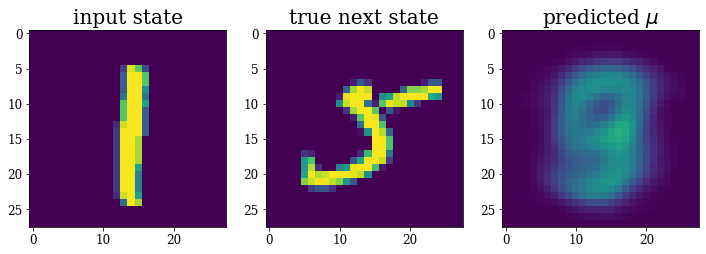

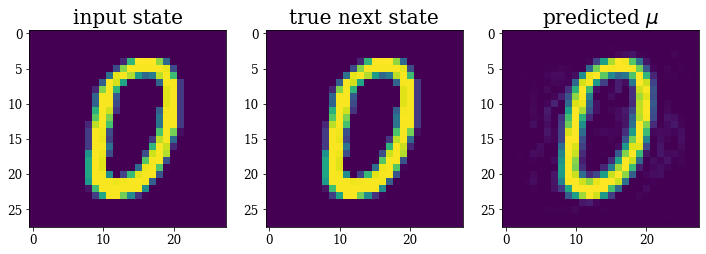

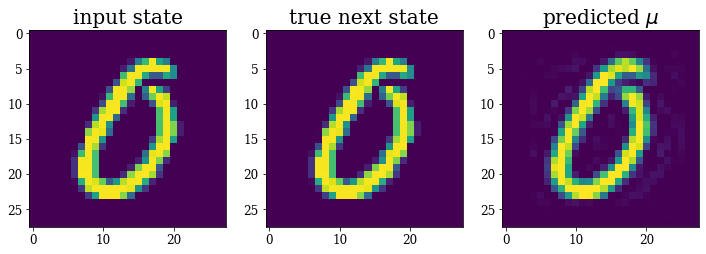

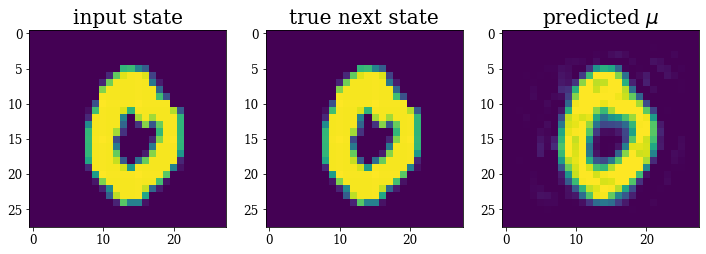

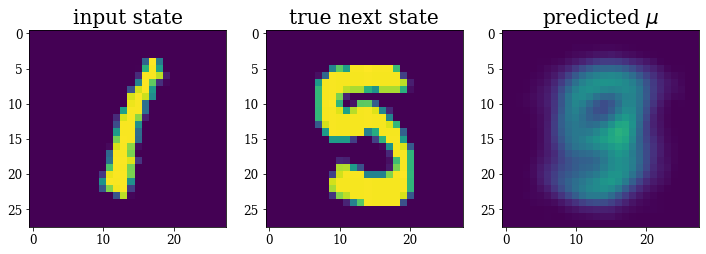

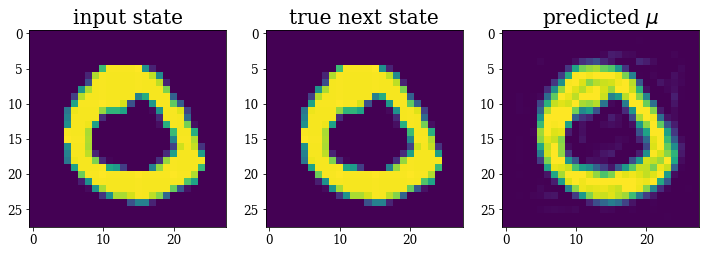

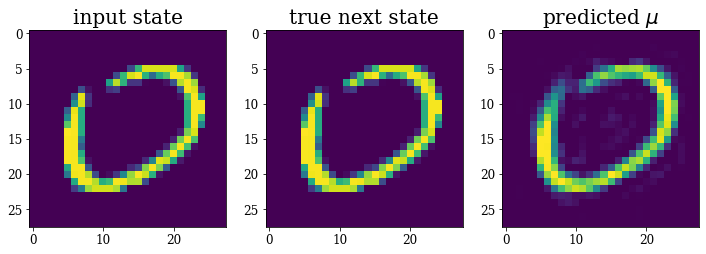

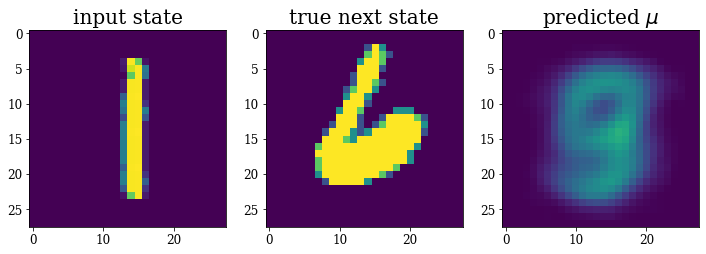

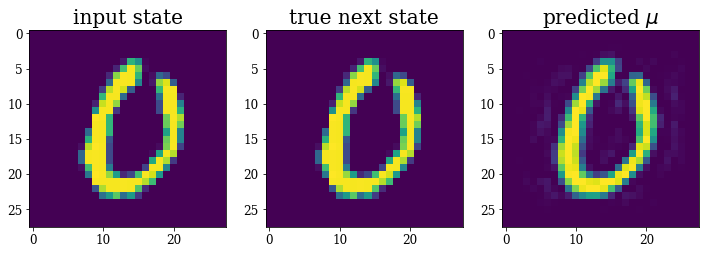

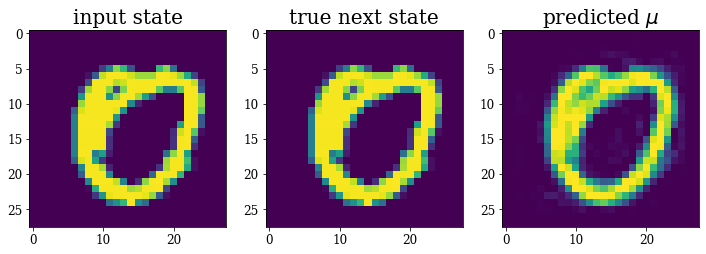

In [7]:
repeats = 3

for repeat in range(repeats):
    model = Net().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    loss_list = []
    loss_buffer = []
    loss_list_0 = []
    loss_list_1 = []
    loss_buffer_0 = []
    loss_buffer_1 = []
    for update in tqdm(range(int(training_steps))):
        model.train()
        data, target = mnist_env.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        loss_buffer.append(loss)
        if update % checkpoint_loss == 0:
            loss_list.append(torch.mean(torch.stack(loss_buffer)).detach().cpu().numpy())
            loss_buffer = []

        model.eval()
        data, target = mnist_env_zeros.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        output = model(data)
        loss_0 = F.mse_loss(output, target)
        loss_buffer_0.append(loss_0)
        if update % checkpoint_loss == 0:
            loss_list_0.append(torch.mean(torch.stack(loss_buffer_0)).detach().cpu().numpy())
            print("loss 0", torch.mean(torch.stack(loss_buffer_0)).detach().cpu().numpy())
            loss_buffer_0 = []
            
        model.eval()
        data, target = mnist_env_ones.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        output = model(data)
        loss_1 = F.mse_loss(output, target)
        loss_buffer_1.append(loss_1)
        if update % checkpoint_loss == 0:
            loss_list_1.append(torch.mean(torch.stack(loss_buffer_1)).detach().cpu().numpy())
            print("loss 1", torch.mean(torch.stack(loss_buffer_1)).detach().cpu().numpy())
            loss_buffer_1 = []

    data, target = mnist_env.step()
    predictions = model(torch.from_numpy(data).float().to(device)/255)

    for i in range(10):
        w=10
        h=10
        fig=plt.figure(figsize=(12, 12))
        columns = 3
        rows = 1
        fig.add_subplot(rows, columns, 1)
        plt.imshow(data[i].reshape(28, 28)/255, vmin=0, vmax=1)
        plt.title("input state", fontsize=20)

        fig.add_subplot(rows, columns, 2)
        plt.imshow(target[i].reshape(28, 28)/255, vmin=0, vmax=1)
        plt.title("true next state", fontsize=20)

        fig.add_subplot(rows, columns, 3)
        plt.imshow(predictions[i].detach().cpu().numpy().reshape(28, 28), vmin=0, vmax=1)
        plt.title("predicted $\mu$", fontsize=20)
        plt.show()
    
    np.save("lost_list_deterministic_" + str(repeat) + ".npy", loss_list_0)
    np.save("lost_list_stochastic_" + str(repeat) + ".npy", loss_list_1)

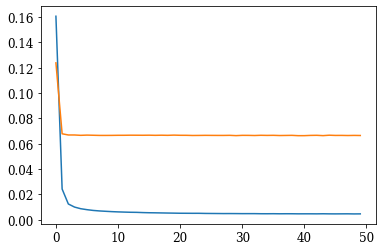

In [8]:
plt.plot(loss_list_0)
plt.plot(loss_list_1)

### Aleatoric ###

  0%|          | 6/50000 [00:00<16:04, 51.83it/s]

loss 0 -0.8565479
loss 1 -0.8744846


  2%|▏         | 1008/50000 [00:18<17:05, 47.76it/s]

loss 0 -0.018221244
loss 1 -0.023224065


  4%|▍         | 2004/50000 [00:37<17:37, 45.40it/s]

loss 0 -0.0042017805
loss 1 -0.007731993


  6%|▌         | 3006/50000 [00:56<17:06, 45.77it/s]

loss 0 -0.0025800392
loss 1 -0.010040446


  8%|▊         | 4008/50000 [01:15<15:59, 47.94it/s]

loss 0 -0.0025098058
loss 1 -0.0064920923


 10%|█         | 5004/50000 [01:33<16:08, 46.45it/s]

loss 0 -0.0023827434
loss 1 -0.0035805712


 12%|█▏        | 6006/50000 [01:52<15:49, 46.34it/s]

loss 0 -0.0024899165
loss 1 -0.002437885


 14%|█▍        | 7002/50000 [02:11<15:26, 46.39it/s]

loss 0 -0.0013055415
loss 1 -0.0014879399


 16%|█▌        | 8008/50000 [02:30<14:26, 48.47it/s]

loss 0 -0.0011099968
loss 1 -0.0017002284


 18%|█▊        | 9010/50000 [02:48<14:05, 48.48it/s]

loss 0 -0.0015823027
loss 1 -0.002140688


 20%|██        | 10006/50000 [03:07<14:09, 47.05it/s]

loss 0 -0.00046039233
loss 1 -0.0014043244


 22%|██▏       | 11008/50000 [03:26<13:25, 48.42it/s]

loss 0 -0.0012811297
loss 1 -0.0014659239


 24%|██▍       | 12004/50000 [03:45<13:32, 46.75it/s]

loss 0 -0.001701659
loss 1 -0.00078575604


 26%|██▌       | 13006/50000 [04:04<13:19, 46.29it/s]

loss 0 -0.00051964365
loss 1 -0.0004879069


 28%|██▊       | 14008/50000 [04:23<12:32, 47.86it/s]

loss 0 -0.0014592591
loss 1 -0.00043027062


 30%|███       | 15004/50000 [04:41<12:30, 46.60it/s]

loss 0 -0.0009880738
loss 1 -0.0010908355


 32%|███▏      | 16006/50000 [05:00<12:12, 46.43it/s]

loss 0 -0.00048252608
loss 1 -0.00055610895


 34%|███▍      | 17008/50000 [05:19<11:20, 48.49it/s]

loss 0 1.4913679e-05
loss 1 -0.0007078948


 36%|███▌      | 18004/50000 [05:38<11:34, 46.10it/s]

loss 0 -0.001048439
loss 1 -0.0028762862


 38%|███▊      | 19006/50000 [05:56<11:52, 43.48it/s]

loss 0 2.4477692e-06
loss 1 -0.0024948232


 40%|████      | 20008/50000 [06:15<10:17, 48.60it/s]

loss 0 -0.00042309283
loss 1 -0.00088580104


 42%|████▏     | 21009/50000 [06:34<10:04, 47.93it/s]

loss 0 -0.00041926248
loss 1 -0.00019475489


 44%|████▍     | 22005/50000 [06:53<10:02, 46.48it/s]

loss 0 -0.0014243019
loss 1 -0.0011764384


 46%|████▌     | 23005/50000 [07:12<09:47, 45.97it/s]

loss 0 -0.000987855
loss 1 -0.0008420297


 48%|████▊     | 24007/50000 [07:30<09:11, 47.09it/s]

loss 0 -0.0019274317
loss 1 0.00046021977


 50%|█████     | 25009/50000 [07:49<08:38, 48.24it/s]

loss 0 -0.00079477887
loss 1 -0.00059243565


 52%|█████▏    | 26010/50000 [08:08<08:21, 47.84it/s]

loss 0 -0.00044914093
loss 1 0.00034272866


 54%|█████▍    | 27006/50000 [08:27<08:27, 45.34it/s]

loss 0 -0.0010381227
loss 1 -0.0019004215


 56%|█████▌    | 28007/50000 [08:46<07:41, 47.71it/s]

loss 0 -0.00042070088
loss 1 -0.00096026104


 58%|█████▊    | 29009/50000 [09:05<07:04, 49.47it/s]

loss 0 -0.00053348776
loss 1 -0.00029677618


 60%|██████    | 30005/50000 [09:23<07:10, 46.48it/s]

loss 0 -0.00032128635
loss 1 -0.0011194326


 62%|██████▏   | 31007/50000 [09:42<06:40, 47.41it/s]

loss 0 -0.0015792423
loss 1 -0.0007766773


 64%|██████▍   | 32009/50000 [10:01<06:15, 47.87it/s]

loss 0 -0.001111384
loss 1 0.0001840672


 66%|██████▌   | 33004/50000 [10:19<06:05, 46.47it/s]

loss 0 -0.00074800756
loss 1 -0.00038070403


 68%|██████▊   | 34006/50000 [10:38<05:43, 46.61it/s]

loss 0 -0.0005499841
loss 1 -0.0014531903


 70%|███████   | 35006/50000 [10:57<05:19, 46.87it/s]

loss 0 -0.00020218543
loss 1 0.0014427293


 72%|███████▏  | 36008/50000 [11:15<04:50, 48.17it/s]

loss 0 -0.0042559565
loss 1 -0.001842614


 74%|███████▍  | 37004/50000 [11:34<04:36, 46.92it/s]

loss 0 -5.223813e-05
loss 1 -0.0018610996


 76%|███████▌  | 38005/50000 [11:53<04:18, 46.40it/s]

loss 0 -0.0016131604
loss 1 -0.0050928686


 78%|███████▊  | 39007/50000 [12:12<03:46, 48.57it/s]

loss 0 0.00020804102
loss 1 -0.00065043836


 80%|████████  | 40009/50000 [12:30<03:24, 48.78it/s]

loss 0 -0.00013693782
loss 1 1.6378873e-06


 82%|████████▏ | 41005/50000 [12:49<03:09, 47.58it/s]

loss 0 -0.00042930717
loss 1 -0.00021479747


 84%|████████▍ | 42007/50000 [13:08<02:44, 48.73it/s]

loss 0 -0.0016096483
loss 1 -0.00082737603


 86%|████████▌ | 43009/50000 [13:27<02:27, 47.54it/s]

loss 0 -0.0004185692
loss 1 -0.00024111333


 88%|████████▊ | 44005/50000 [13:45<02:08, 46.56it/s]

loss 0 -0.0007195066
loss 1 -0.0007803939


 90%|█████████ | 45006/50000 [14:04<01:48, 46.16it/s]

loss 0 -0.0046189195
loss 1 -0.005849684


 92%|█████████▏| 46008/50000 [14:23<01:22, 48.52it/s]

loss 0 -0.00013598366
loss 1 -0.0008337703


 94%|█████████▍| 47004/50000 [14:41<01:04, 46.53it/s]

loss 0 -0.0002147019
loss 1 -7.003668e-05


 96%|█████████▌| 48006/50000 [15:00<00:42, 46.86it/s]

loss 0 -0.0005066164
loss 1 -0.0001697716


 98%|█████████▊| 49008/50000 [15:19<00:20, 48.44it/s]

loss 0 -0.00035945603
loss 1 0.0002078033


100%|██████████| 50000/50000 [15:37<00:00, 53.31it/s]


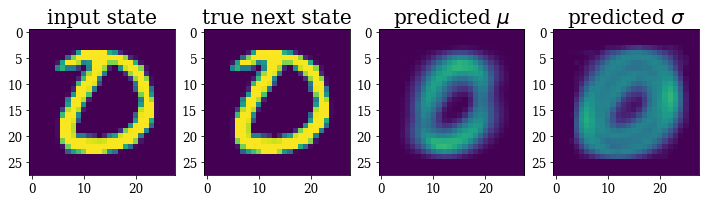

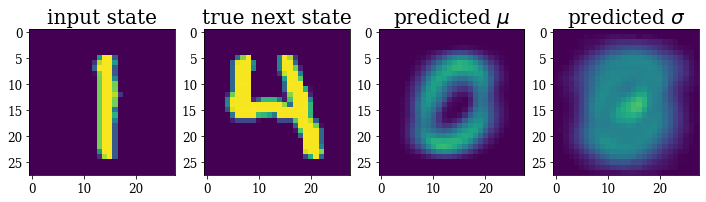

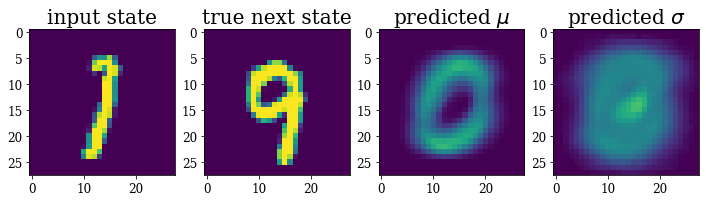

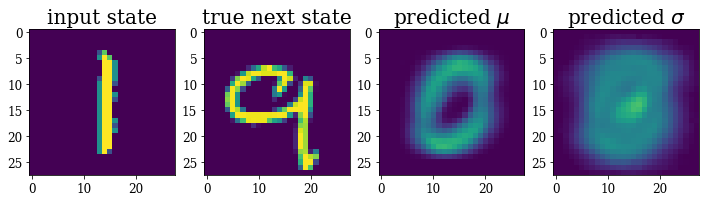

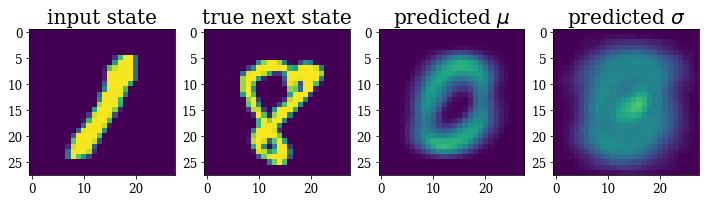

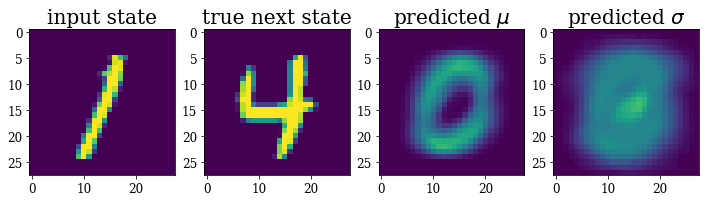

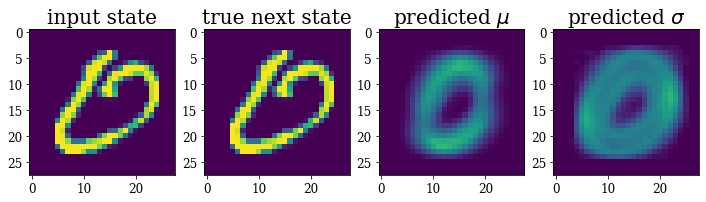

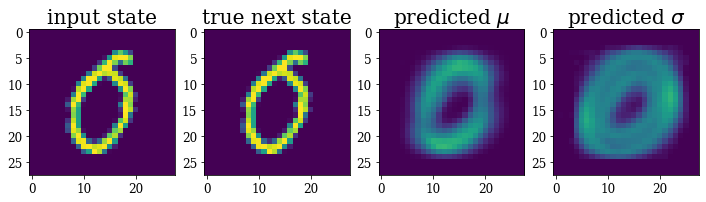

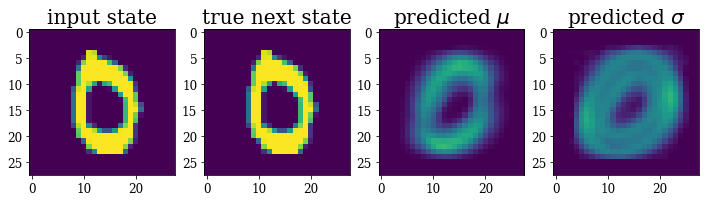

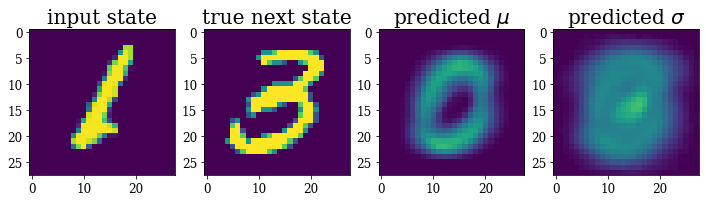

  0%|          | 6/50000 [00:00<15:39, 53.22it/s]

loss 0 -0.85183996
loss 1 -0.88052785


  2%|▏         | 1008/50000 [00:19<17:29, 46.70it/s]

loss 0 -0.021796498
loss 1 -0.02384346


  4%|▍         | 2010/50000 [00:38<16:09, 49.49it/s]

loss 0 -0.007213722
loss 1 -0.008160851


  6%|▌         | 3006/50000 [00:56<17:04, 45.86it/s]

loss 0 -0.0020297794
loss 1 -0.015325249


  8%|▊         | 4007/50000 [01:15<17:05, 44.84it/s]

loss 0 -0.0018247617
loss 1 -0.0044851853


 10%|█         | 5009/50000 [01:34<15:34, 48.17it/s]

loss 0 -0.0024425404
loss 1 -0.00605984


 12%|█▏        | 6005/50000 [01:53<16:06, 45.52it/s]

loss 0 -0.0010920545
loss 1 -0.0020174703


 14%|█▍        | 7007/50000 [02:12<14:53, 48.10it/s]

loss 0 -0.00072066154
loss 1 -0.0029610277


 16%|█▌        | 8008/50000 [02:31<14:45, 47.45it/s]

loss 0 -0.0008905636
loss 1 -0.0015770547


 18%|█▊        | 9004/50000 [02:50<15:17, 44.67it/s]

loss 0 -0.0012701235
loss 1 -0.0014367974


 20%|██        | 10006/50000 [03:09<14:27, 46.13it/s]

loss 0 -0.00061918196
loss 1 -0.0013910135


 22%|██▏       | 11007/50000 [03:27<13:40, 47.51it/s]

loss 0 -0.0006327334
loss 1 -0.0025235082


 24%|██▍       | 12009/50000 [03:46<13:14, 47.79it/s]

loss 0 -0.003740909
loss 1 -0.0066990005


 26%|██▌       | 13005/50000 [04:05<13:28, 45.74it/s]

loss 0 -0.0005847183
loss 1 -0.0022935658


 28%|██▊       | 14007/50000 [04:24<12:09, 49.33it/s]

loss 0 -0.0006225463
loss 1 -0.0022510195


 30%|███       | 15009/50000 [04:43<12:07, 48.11it/s]

loss 0 -0.00094091246
loss 1 -0.0013165055


 32%|███▏      | 16004/50000 [05:02<12:13, 46.32it/s]

loss 0 -0.00060276967
loss 1 -0.0060992893


 34%|███▍      | 17006/50000 [05:21<11:50, 46.45it/s]

loss 0 -0.00068453944
loss 1 -0.0011811765


 36%|███▌      | 18008/50000 [05:39<11:07, 47.96it/s]

loss 0 -0.00088280684
loss 1 -0.002579568


 38%|███▊      | 19010/50000 [05:58<10:37, 48.58it/s]

loss 0 -0.0009626835
loss 1 -0.0005505134


 40%|████      | 20005/50000 [06:17<10:41, 46.76it/s]

loss 0 -0.0007597734
loss 1 6.1066174e-05


 42%|████▏     | 21007/50000 [06:36<10:00, 48.28it/s]

loss 0 -0.000106939544
loss 1 -0.00036203797


 44%|████▍     | 22009/50000 [06:55<09:46, 47.76it/s]

loss 0 -0.00042181148
loss 1 -0.0018056965


 46%|████▌     | 23005/50000 [07:14<09:38, 46.63it/s]

loss 0 -0.000309659
loss 1 -0.0015911994


 48%|████▊     | 24007/50000 [07:32<08:53, 48.75it/s]

loss 0 -0.00033028837
loss 1 -0.00070692855


 50%|█████     | 25009/50000 [07:52<08:36, 48.37it/s]

loss 0 -0.00061607966
loss 1 -0.0011330942


 52%|█████▏    | 26005/50000 [08:10<08:34, 46.61it/s]

loss 0 -0.00096051
loss 1 -0.0014641914


 54%|█████▍    | 27006/50000 [08:29<08:21, 45.89it/s]

loss 0 -0.0008553372
loss 1 -0.0009844436


 56%|█████▌    | 28008/50000 [08:48<07:39, 47.84it/s]

loss 0 -0.000119782475
loss 1 -0.00051565294


 58%|█████▊    | 29004/50000 [09:07<07:28, 46.78it/s]

loss 0 -0.0010430164
loss 1 -0.00041080668


 60%|██████    | 30006/50000 [09:26<07:11, 46.32it/s]

loss 0 0.00046218705
loss 1 -0.00024932457


 62%|██████▏   | 31008/50000 [09:45<06:39, 47.56it/s]

loss 0 -0.00027684128
loss 1 -0.0062626814


 64%|██████▍   | 32009/50000 [10:04<06:21, 47.21it/s]

loss 0 -0.0005539041
loss 1 -0.0074059777


 66%|██████▌   | 33005/50000 [10:23<06:06, 46.40it/s]

loss 0 -0.0001863843
loss 1 0.00039844148


 68%|██████▊   | 34007/50000 [10:42<05:32, 48.09it/s]

loss 0 0.0001654022
loss 1 -0.00016224202


 70%|███████   | 35009/50000 [11:01<05:11, 48.09it/s]

loss 0 -0.00038869467
loss 1 -0.0023007416


 72%|███████▏  | 36005/50000 [11:19<05:03, 46.04it/s]

loss 0 -0.0016546784
loss 1 -0.003467914


 74%|███████▍  | 37007/50000 [11:38<04:33, 47.58it/s]

loss 0 -0.0005469098
loss 1 -0.0006795724


 76%|███████▌  | 38003/50000 [11:57<04:40, 42.82it/s]

loss 0 -0.0002453681
loss 1 -0.0009042799


 78%|███████▊  | 39005/50000 [12:16<03:59, 45.98it/s]

loss 0 -0.0006306291
loss 1 -0.0017137065


 80%|████████  | 40007/50000 [12:35<03:27, 48.26it/s]

loss 0 -0.00049487565
loss 1 -0.00034475268


 82%|████████▏ | 41009/50000 [12:54<03:07, 48.05it/s]

loss 0 -0.00027145815
loss 1 -0.0012944394


 84%|████████▍ | 42004/50000 [13:13<02:52, 46.25it/s]

loss 0 -0.0003755057
loss 1 -0.001145156


 86%|████████▌ | 43005/50000 [13:31<02:37, 44.45it/s]

loss 0 -0.00054361403
loss 1 -0.0007976451


 88%|████████▊ | 44007/50000 [13:50<02:03, 48.54it/s]

loss 0 -0.000779439
loss 1 -0.000769599


 90%|█████████ | 45009/50000 [14:09<01:44, 47.85it/s]

loss 0 -0.0005392267
loss 1 -0.0009111622


 92%|█████████▏| 46005/50000 [14:28<01:25, 46.49it/s]

loss 0 -0.00010258439
loss 1 -0.00057536113


 94%|█████████▍| 47007/50000 [14:47<01:02, 48.18it/s]

loss 0 -0.000853239
loss 1 -0.0007631946


 96%|█████████▌| 48009/50000 [15:06<00:41, 48.10it/s]

loss 0 0.00013775229
loss 1 -0.00028330396


 98%|█████████▊| 49005/50000 [15:24<00:21, 46.17it/s]

loss 0 -0.00028347626
loss 1 -0.00043945378


100%|██████████| 50000/50000 [15:43<00:00, 52.99it/s]


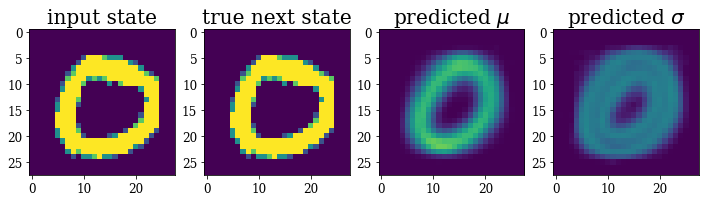

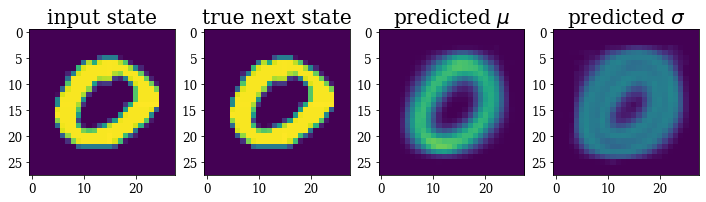

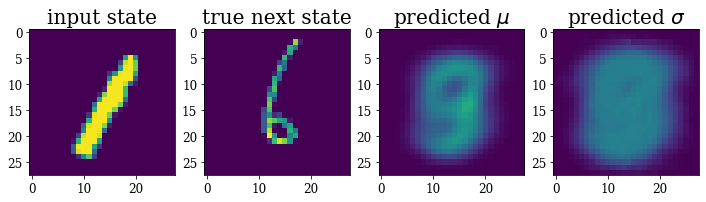

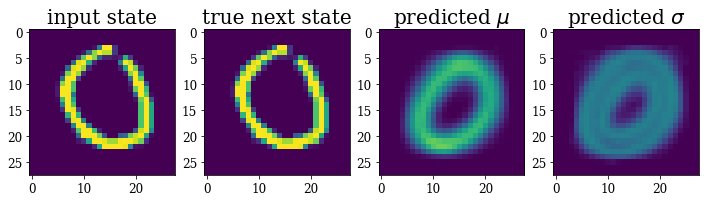

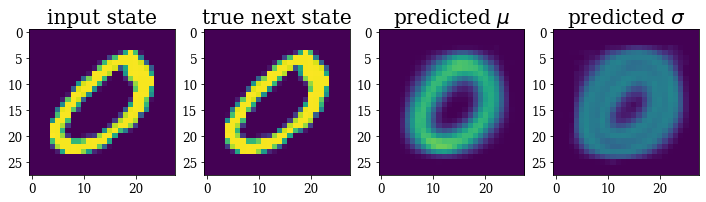

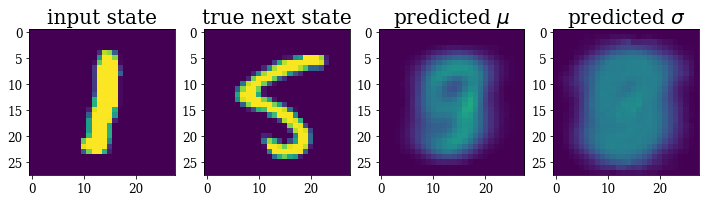

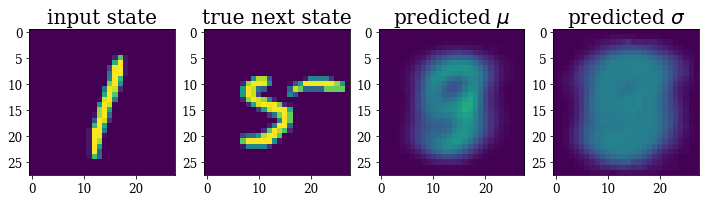

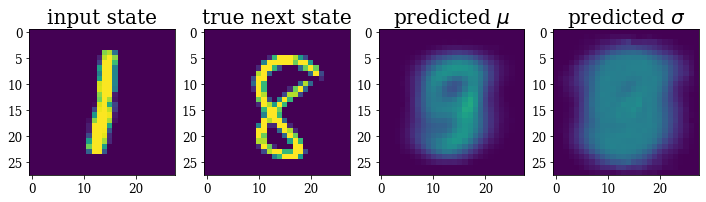

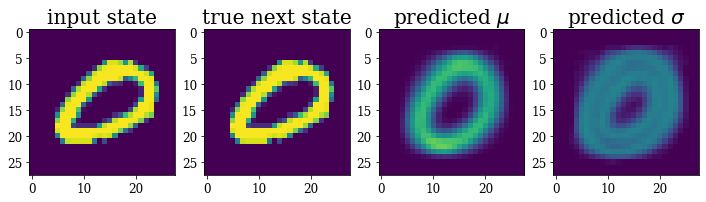

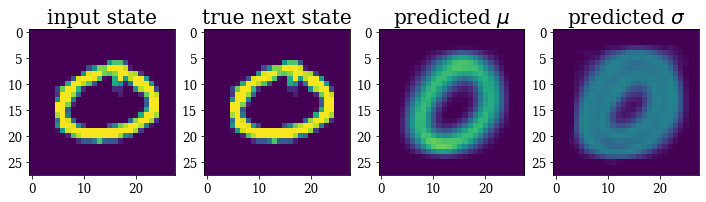

  0%|          | 6/50000 [00:00<16:19, 51.03it/s]

loss 0 -0.8495899
loss 1 -0.8780605


  2%|▏         | 1008/50000 [00:19<16:50, 48.48it/s]

loss 0 -0.022149583
loss 1 -0.024002908


  4%|▍         | 2009/50000 [00:37<16:43, 47.83it/s]

loss 0 -0.0034362113
loss 1 -0.012928899


  6%|▌         | 3005/50000 [00:56<17:03, 45.93it/s]

loss 0 -0.0020079364
loss 1 -0.013019246


  8%|▊         | 4007/50000 [01:15<16:04, 47.67it/s]

loss 0 -0.0011796393
loss 1 -0.004638549


 10%|█         | 5009/50000 [01:34<15:40, 47.86it/s]

loss 0 -0.0043756403
loss 1 -0.010697268


 12%|█▏        | 6005/50000 [01:53<15:47, 46.43it/s]

loss 0 -0.00025731113
loss 1 -0.005160809


 14%|█▍        | 7007/50000 [02:12<14:41, 48.77it/s]

loss 0 -0.0004727884
loss 1 -0.0005151968


 16%|█▌        | 8008/50000 [02:31<14:37, 47.86it/s]

loss 0 -0.00024081055
loss 1 -0.0010944079


 18%|█▊        | 9010/50000 [02:49<14:09, 48.25it/s]

loss 0 -0.00015997681
loss 1 -0.0012045812


 20%|██        | 10004/50000 [03:08<14:27, 46.11it/s]

loss 0 -0.00038306144
loss 1 -0.0017265931


 22%|██▏       | 11006/50000 [03:27<14:30, 44.79it/s]

loss 0 -0.00053145736
loss 1 -0.0012539171


 24%|██▍       | 12008/50000 [03:46<13:12, 47.93it/s]

loss 0 -9.098459e-05
loss 1 -0.0011903329


 26%|██▌       | 13004/50000 [04:05<13:29, 45.72it/s]

loss 0 -0.0009555845
loss 1 -0.0014909351


 28%|██▊       | 14006/50000 [04:23<12:55, 46.43it/s]

loss 0 -0.001268771
loss 1 -0.0008110091


 30%|███       | 15008/50000 [04:42<12:06, 48.19it/s]

loss 0 -0.00013858169
loss 1 -0.0019471237


 32%|███▏      | 16004/50000 [05:01<12:18, 46.05it/s]

loss 0 -0.00037295028
loss 1 -0.0015937127


 34%|███▍      | 17006/50000 [05:20<11:59, 45.87it/s]

loss 0 -0.002661112
loss 1 -0.0041335085


 36%|███▌      | 18008/50000 [05:39<11:17, 47.24it/s]

loss 0 0.00035174628
loss 1 -0.00094085967


 38%|███▊      | 19010/50000 [05:58<10:42, 48.27it/s]

loss 0 9.739466e-05
loss 1 -0.000728435


 40%|████      | 20006/50000 [06:16<10:54, 45.82it/s]

loss 0 -0.00012169631
loss 1 -0.000899872


 42%|████▏     | 21008/50000 [06:35<10:04, 47.93it/s]

loss 0 0.0001279606
loss 1 -0.00102422


 44%|████▍     | 22008/50000 [06:54<09:46, 47.72it/s]

loss 0 1.2778401e-05
loss 1 -0.0011006952


 46%|████▌     | 23010/50000 [07:13<09:18, 48.28it/s]

loss 0 -2.19491e-05
loss 1 -0.00081282976


 48%|████▊     | 24006/50000 [07:32<09:22, 46.19it/s]

loss 0 -0.0007106741
loss 1 -0.0010285247


 50%|█████     | 25008/50000 [07:51<08:34, 48.58it/s]

loss 0 -0.00046922616
loss 1 -0.0009068509


 52%|█████▏    | 26004/50000 [08:09<08:40, 46.06it/s]

loss 0 -0.00063078245
loss 1 -0.0008522691


 54%|█████▍    | 27006/50000 [08:28<08:19, 46.06it/s]

loss 0 -0.00040596104
loss 1 -0.0016105553


 56%|█████▌    | 28008/50000 [08:47<07:37, 48.04it/s]

loss 0 9.689311e-05
loss 1 -0.0008156941


 58%|█████▊    | 29004/50000 [09:06<07:33, 46.31it/s]

loss 0 -0.0004597657
loss 1 -0.0006465277


 60%|██████    | 30006/50000 [09:25<07:11, 46.31it/s]

loss 0 -0.00029789182
loss 1 -0.0009709679


 62%|██████▏   | 31008/50000 [09:43<06:33, 48.28it/s]

loss 0 -0.00053896825
loss 1 -0.0010814198


 64%|██████▍   | 32004/50000 [10:02<06:29, 46.17it/s]

loss 0 -0.0005935686
loss 1 -0.00023876737


 66%|██████▌   | 33006/50000 [10:21<06:09, 45.96it/s]

loss 0 -0.00027499933
loss 1 -0.00089939113


 68%|██████▊   | 34008/50000 [10:40<05:40, 47.02it/s]

loss 0 -0.003092788
loss 1 -0.0022846614


 70%|███████   | 35009/50000 [10:59<05:12, 47.97it/s]

loss 0 0.00027193065
loss 1 -0.0011219473


 72%|███████▏  | 36004/50000 [11:17<05:05, 45.81it/s]

loss 0 2.482533e-05
loss 1 -0.0011767645


 74%|███████▍  | 37006/50000 [11:36<04:36, 46.92it/s]

loss 0 -0.00053667475
loss 1 -0.00096532097


 76%|███████▌  | 38008/50000 [11:55<04:05, 48.75it/s]

loss 0 -0.00020895213
loss 1 -0.0014633408


 78%|███████▊  | 39004/50000 [12:14<03:58, 46.06it/s]

loss 0 -0.00024838283
loss 1 -0.0012527942


 80%|████████  | 40005/50000 [12:33<03:33, 46.73it/s]

loss 0 -0.00056538783
loss 1 -0.001137433


 82%|████████▏ | 41007/50000 [12:51<03:04, 48.61it/s]

loss 0 -0.00047014837
loss 1 -0.00090243766


 84%|████████▍ | 42009/50000 [13:10<02:46, 47.87it/s]

loss 0 -0.00015964449
loss 1 -0.001064644


 86%|████████▌ | 43005/50000 [13:29<02:31, 46.30it/s]

loss 0 -0.00015604282
loss 1 -0.0013081799


 88%|████████▊ | 44007/50000 [13:48<02:05, 47.79it/s]

loss 0 -0.0002421196
loss 1 -0.0006517467


 90%|█████████ | 45009/50000 [14:07<01:42, 48.48it/s]

loss 0 -0.00011926992
loss 1 -0.0006508228


 92%|█████████▏| 46005/50000 [14:25<01:26, 45.96it/s]

loss 0 -0.00011839712
loss 1 -0.00087345473


 94%|█████████▍| 47007/50000 [14:44<01:03, 47.49it/s]

loss 0 -8.0513755e-06
loss 1 -0.0006585024


 96%|█████████▌| 48009/50000 [15:03<00:41, 48.13it/s]

loss 0 -0.00020715578
loss 1 -0.00057267695


 98%|█████████▊| 49005/50000 [15:22<00:21, 46.64it/s]

loss 0 -0.0004430081
loss 1 -0.0004951868


100%|██████████| 50000/50000 [15:40<00:00, 53.14it/s]


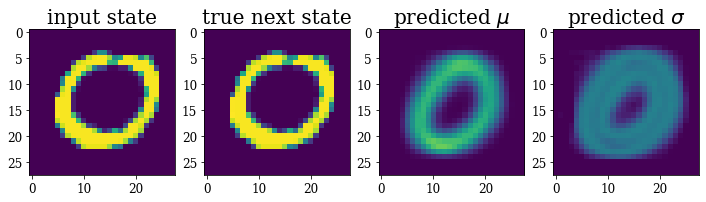

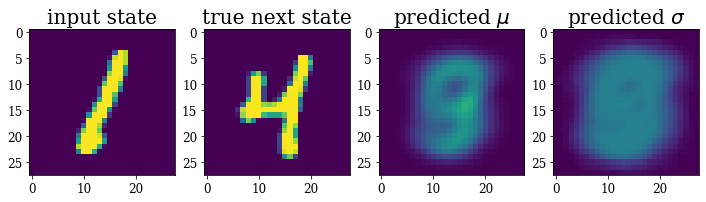

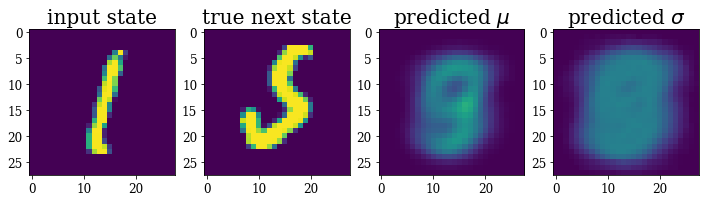

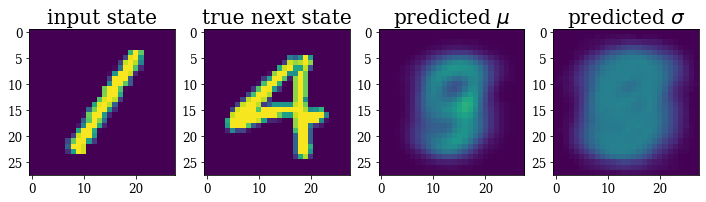

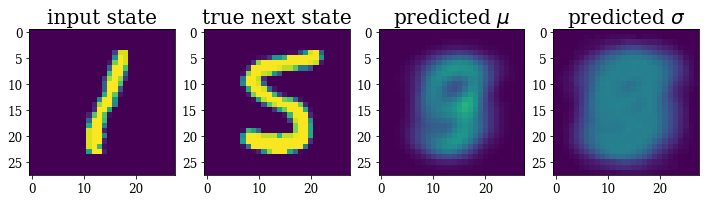

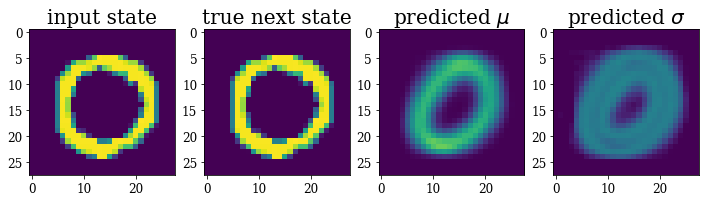

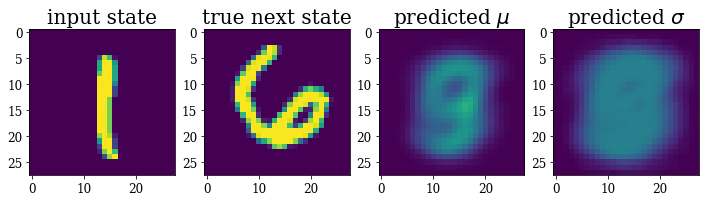

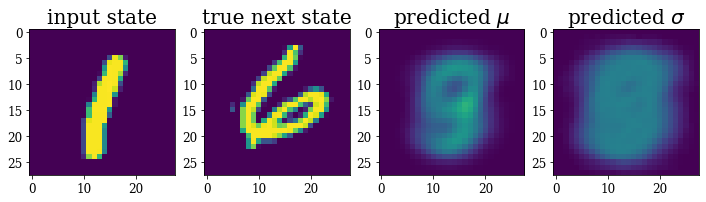

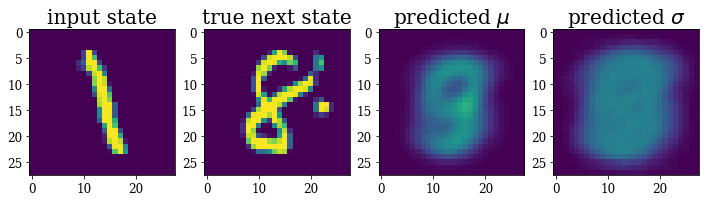

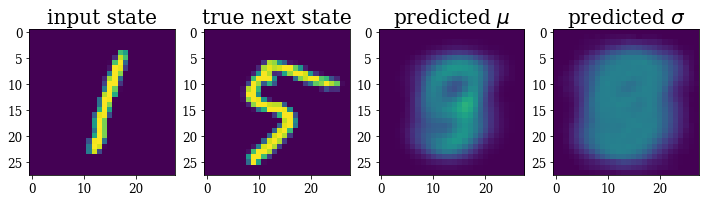

In [9]:
repeats = 3
for repeat in range(repeats):
    model = AleatoricNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model.train()
    loss_list_aleatoric = []
    loss_buffer = []
    loss_list_0_aleatoric = []
    loss_list_1_aleatoric = []
    loss_buffer_0 = []
    loss_buffer_1 = []

    for update in tqdm(range(int(training_steps))):
        model.train()
        data, target = mnist_env.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        optimizer.zero_grad()
        mu, log_sigma = model(data)
        mse = F.mse_loss(mu, target, reduction="none")
        loss = torch.mean(torch.exp(-log_sigma) * mse + log_sigma)
        loss.backward()
        optimizer.step()
        loss_buffer.append(torch.mean(mse - torch.exp(log_sigma)))
        if update % checkpoint_loss == 0:
            loss_list_aleatoric.append(torch.mean(torch.stack(loss_buffer)).detach().cpu().numpy())
            loss_buffer = []

        model.eval()
        data, target = mnist_env_zeros.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        optimizer.zero_grad()
        mu, log_sigma = model(data)
        mse = F.mse_loss(mu, target, reduction="none")
        loss = torch.mean(torch.exp(-log_sigma) * mse + log_sigma)
        loss_buffer_0.append(torch.mean(mse - torch.exp(log_sigma)))
        if update % checkpoint_loss == 0:
            loss_list_0_aleatoric.append(torch.mean(torch.stack(loss_buffer_0)).detach().cpu().numpy())
            print("loss 0", torch.mean(torch.stack(loss_buffer_0)).detach().cpu().numpy())
            loss_buffer_0 = []

        model.eval()
        data, target = mnist_env_ones.step()
        data /= 255
        target /= 255
        data = torch.from_numpy(data).float().to(device)
        target = torch.from_numpy(target).float().to(device)
        optimizer.zero_grad()
        mu, log_sigma = model(data)
        mse = F.mse_loss(mu, target, reduction="none")
        loss = torch.mean(torch.exp(-log_sigma) * mse + log_sigma)
        loss_buffer_1.append(torch.mean(mse - torch.exp(log_sigma)))
        if update % checkpoint_loss == 0:
            loss_list_1_aleatoric.append(torch.mean(torch.stack(loss_buffer_1)).detach().cpu().numpy())
            print("loss 1", torch.mean(torch.stack(loss_buffer_1)).detach().cpu().numpy())
            loss_buffer_1 = []

    data, target = mnist_env.step()
    mu, sigma = model(torch.from_numpy(data).float().to(device)/255)

    for i in range(10):
        w=10
        h=10
        fig=plt.figure(figsize=(12, 12))
        columns = 4
        rows = 1
        fig.add_subplot(rows, columns, 1)
        plt.imshow(data[i].reshape(28, 28)/255, vmin=0, vmax=1)
        plt.title("input state", fontsize=20)

        fig.add_subplot(rows, columns, 2)
        plt.imshow(target[i].reshape(28, 28)/255, vmin=0, vmax=1)
        plt.title("true next state", fontsize=20)

        fig.add_subplot(rows, columns, 3)
        plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=0, vmax=1)
        plt.title("predicted $\mu$", fontsize=20)

        fig.add_subplot(rows, columns, 4)
        plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=0, vmax=1)
        plt.title("predicted $\sigma$", fontsize=20)

        plt.show()
    np.save("lost_list_aleatoric_deterministic_" + str(repeat) + ".npy", loss_list_0_aleatoric)
    np.save("lost_list_aleatoric_stochastic_" + str(repeat) + ".npy", loss_list_1_aleatoric)

(-0.05, 0.01)

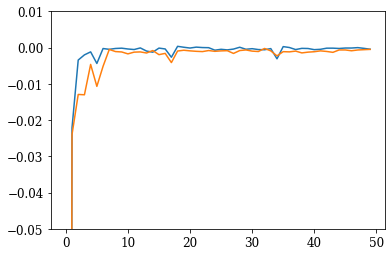

In [10]:
plt.plot(loss_list_0_aleatoric)
plt.plot(loss_list_1_aleatoric)
plt.ylim(-0.05,0.01)

<Figure size 16000x12000 with 0 Axes>

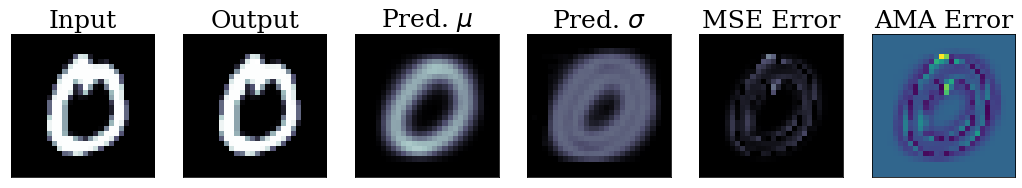

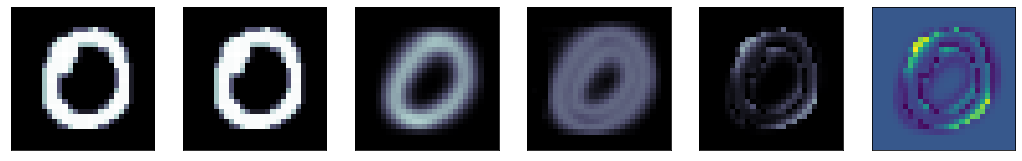

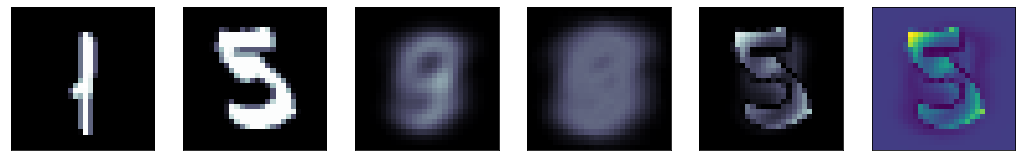

In [11]:
data, target = mnist_env.step()
mu, sigma = model(torch.from_numpy(data).float().to(device)/255)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 25
cmap='bone'

for i in range(3):
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=0, vmax=1, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=0, vmax=1, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=0, vmax=1, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=0, vmax=1, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    plt.imshow(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28), vmin=0, vmax=1, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("MSE Error", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    plt.imshow(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("AMA Error", fontsize=title_size)

    plt.show()

<Figure size 16000x12000 with 0 Axes>

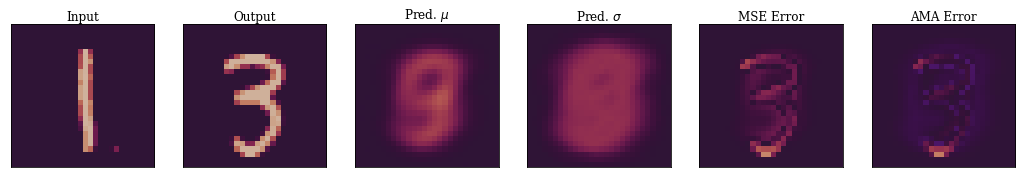

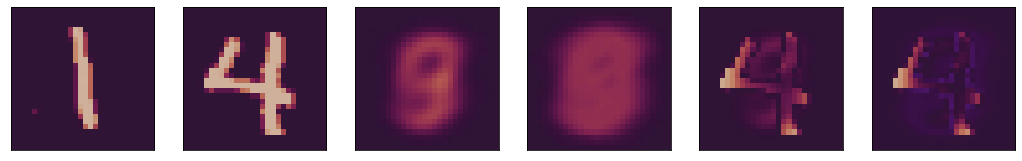

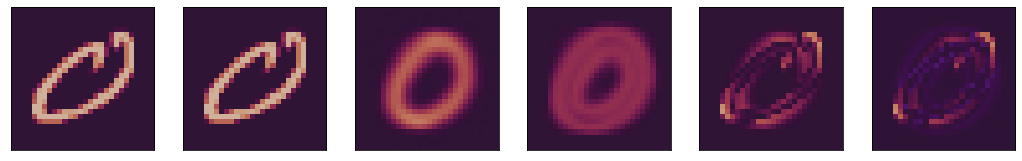

In [28]:
data, target = mnist_env.step()
mu, sigma = model(torch.from_numpy(data).float().to(device)/255)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 12
cmap='twilight'
lower_color, higher_color = -1.25, 1.25 

for i in range(3):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("MSE Error", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28) 
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    avg_error = np.mean(error)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(30)
    plt.show()

In [ ]:
data, target = mnist_env.step()
mu, sigma = model(torch.from_numpy(data).float().to(device)/255)

for i in range(10):
    w=10
    h=10
    fig=plt.figure(figsize=(12, 12))
    columns = 5
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=0, vmax=1)
    plt.title("input state", fontsize=20)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=0, vmax=1)
    plt.title("true next state", fontsize=20)

    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=0, vmax=1)
    plt.title("predicted $\mu$", fontsize=20)

    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=0, vmax=1)
    plt.title("predicted $\sigma$", fontsize=20)

    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1)
    plt.xticks([])
    plt.yticks([])
    #if i == 0:
    plt.title(str(avg_error), fontsize=title_size)
    plt.show()

In [ ]:
updates = [x * 1000 for x in list(range(len(loss_list_0_aleatoric)))]
plt.plot(updates,loss_list_0_aleatoric,label="Aleatoric Net Less Stochastic")
plt.plot(updates,loss_list_1_aleatoric,label="Aleatoric Net More Stochastic")
plt.plot(updates,loss_list_0,label="Vanilla Net Less Stochastic")
plt.plot(updates,loss_list_1,label="Vanilla Net More Stochastic")
plt.legend(loc="best", fontsize=12)
plt.ylabel("Intrinsic Reward", fontsize=15)
plt.xlabel("Update step", fontsize=15)
plt.ylim(-0.05, 0.2)
plt.title("Noisy MNIST", fontsize=20)

['lost_list_stochastic_0.npy', 'lost_list_stochastic_1.npy', 'lost_list_stochastic_2.npy']
['lost_list_deterministic_2.npy', 'lost_list_deterministic_1.npy', 'lost_list_deterministic_0.npy']
['lost_list_aleatoric_stochastic_2.npy', 'lost_list_aleatoric_stochastic_1.npy', 'lost_list_aleatoric_stochastic_0.npy']
['lost_list_aleatoric_deterministic_0.npy', 'lost_list_aleatoric_deterministic_1.npy', 'lost_list_aleatoric_deterministic_2.npy']


Text(0.5, 1.0, 'Noisy MNIST')

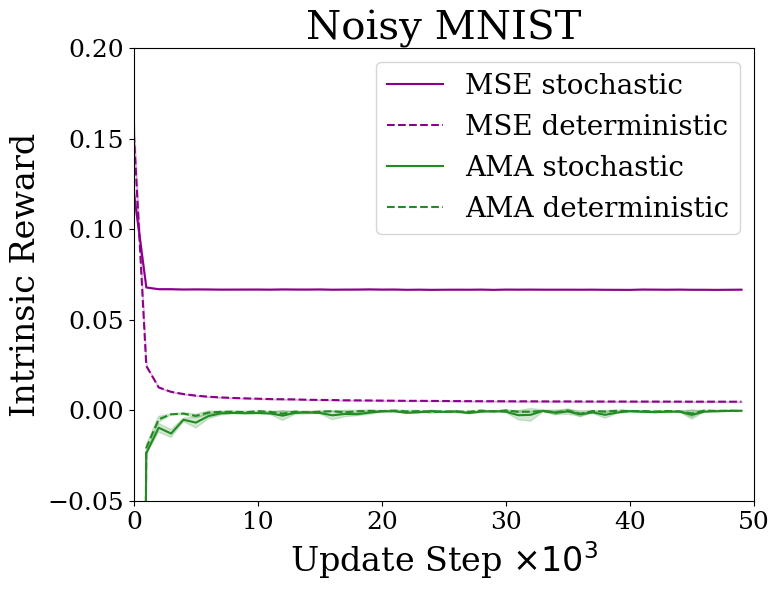

In [18]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
from matplotlib import rcParams
rcParams['axes.titlepad'] =2 

def load_files_into_arr(list_of_file_paths):
    all_arrs = []
    for a_file in list_of_file_paths:
        all_arrs.append(np.load(a_file))
    return all_arrs

def get_mean_and_std_dev(arr_of_results):
    return np.mean(arr_of_results, axis=0), np.std(arr_of_results, axis=0)

def plot_mean_and_std(mean, std, label):
    assert len(mean) == len(std)
    if "stochastic" in label:
        linestyle="-"
    else:
        linestyle="--"
    if "AMA" in label:
        color="forestgreen"
    else:
        color="darkmagenta"
    plt.plot(list(range(len(mean))), mean, linestyle=linestyle, label=label, color=color)
    x = list(range(len(mean)))
    plt.fill_between(x, (mean-std), (mean+std), alpha=0.2, color=color)

import glob
npy_files = glob.glob("*npy")
aleatoric_stochastic = [file for file in npy_files if "stochastic" in file and "aleatoric" in file]
aleatoric_deterministic = [file for file in npy_files if "deterministic" in file and "aleatoric" in file]
vanilla_deterministic = [file for file in npy_files if "aleatoric" not in file and "deterministic" in file]
vanilla_stochastic = [file for file in npy_files if "aleatoric" not in file and "stochastic" in file]

list_of_file_lists =[vanilla_stochastic, vanilla_deterministic, aleatoric_stochastic, aleatoric_deterministic,]

print(vanilla_stochastic)
print(vanilla_deterministic)
print(aleatoric_stochastic)
print(aleatoric_deterministic)

legends = [r"MSE stochastic",
           r"MSE deterministic",
           r"AMA stochastic",
           r"AMA deterministic"]

colors = ["darkmagenta", "forestgreen"]
plt.xlim(0, 50)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

for i, files in enumerate(list_of_file_lists):
    results = load_files_into_arr(files)
    mu, sigma = get_mean_and_std_dev(results)
    plot_mean_and_std(mu, sigma, legends[i])

plt.rc('font', family='serif')
plt.legend(loc="best", fontsize=20)
plt.ylabel("Intrinsic Reward", fontsize=24)
plt.xlabel(r"Update Step $\times 10 ^{3}$", fontsize=24)
plt.ylim(-0.05, 0.2)
plt.title("Noisy MNIST", fontsize=29)